### 아파트 단지 폴리곤데이터 확인하기

KRX 전국 아파트단지 폴리곤데이터 전처리 
용인시내의 폴리곤만 추출 / PNU코드->지번코드로 변경하여 아파트 이름 얻어내기

In [ ]:
import json
import requests

# 아파트 건물정보 json파일 불러오기 

with open("/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/아파트단지별구역정보(POLYGON).json") as f:
    contents = f.read() # string 타입
    json_data = json.loads(contents)


In [ ]:
len(json_data)

406756

In [ ]:
# I = 토지 / b = 건물
df_aptinfo = pd.DataFrame(json_data)
df_aptinfo

,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,64997,2714012300103770007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872821,128.713170,None
1,64997,2714012300103770020,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872828,128.712973,None
2,55111,1111010900100400000,"{""type"": ""Polygon"", ""coordinates"": [[[126.9662...",l,37.580694,126.966339,None
3,37706,1150010300110520011,"{""type"": ""Polygon"", ""coordinates"": [[[126.8401...",l,37.542610,126.840156,None
4,65768,4827010400103550007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7510...",l,35.487799,128.750888,None
...,...,...,...,...,...,...,...
406751,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",l,37.547579,127.139133,None
406752,105987,1174010900100370009,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547739,127.139154,2001212226914495054200000000
406753,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547587,127.139159,2001212227904494893000000000
406754,105988,1174010900100380016,"{""type"": ""Polygon"", ""coordinates"": [[[127.1389...",l,37.545860,127.138856,None


In [ ]:
df_aptinfo[df_aptinfo['PNU'].str.startswith('4146')]

,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
4639,75375,4146125321104790007,"{""type"": ""Polygon"", ""coordinates"": [[[127.2511...",l,37.334535,127.251074,None
4640,75375,4146125321104790029,"{""type"": ""Polygon"", ""coordinates"": [[[127.2511...",l,37.334424,127.251291,None
24499,75424,4146310300101200013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1080...",l,37.269103,127.107884,None
24651,81,4146510600107260000,"{""type"": ""Polygon"", ""coordinates"": [[[127.0751...",l,37.318210,127.073024,None
24652,81,4146510600107260000,"{""type"": ""Polygon"", ""coordinates"": [[[127.0710...",b,37.316818,127.071204,2002206241794238704300000000
...,...,...,...,...,...,...,...
394710,100702,4146510500101300007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0721...",l,37.327801,127.072005,None
400602,103339,4146110100103350002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2000...",l,37.233745,127.199941,None
400603,103339,4146110100103350010,"{""type"": ""Polygon"", ""coordinates"": [[[127.1996...",l,37.233564,127.199818,None
400604,103339,4146110100103350002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2001...",b,37.233782,127.199940,1990217672224146710400000000


In [ ]:
len(df_aptinfo['LA'].dropna().tolist())

406046

In [ ]:
df_aptinfo['BLDID_ID'].value_counts()

81934    252
7736     229
8475     194
11082    194
58418    191
        ... 
95639      1
60116      1
73445      1
95644      1
40910      1
Name: BLDID_ID, Length: 84022, dtype: int64

In [ ]:
# 데이터프레임 인덱스도 맞춰주기 (la,lo 결측값 drop)
ind = df_aptinfo['LA'].dropna().index

ind = df_aptinfo.drop(ind).index

df_aptinfo = df_aptinfo.drop(ind)
df_aptinfo = df_aptinfo.reset_index()
df_aptinfo

,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,0,64997,2714012300103770007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872821,128.713170,None
1,1,64997,2714012300103770020,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872828,128.712973,None
2,2,55111,1111010900100400000,"{""type"": ""Polygon"", ""coordinates"": [[[126.9662...",l,37.580694,126.966339,None
3,3,37706,1150010300110520011,"{""type"": ""Polygon"", ""coordinates"": [[[126.8401...",l,37.542610,126.840156,None
4,4,65768,4827010400103550007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7510...",l,35.487799,128.750888,None
...,...,...,...,...,...,...,...,...
406041,406751,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",l,37.547579,127.139133,None
406042,406752,105987,1174010900100370009,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547739,127.139154,2001212226914495054200000000
406043,406753,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547587,127.139159,2001212227904494893000000000
406044,406754,105988,1174010900100380016,"{""type"": ""Polygon"", ""coordinates"": [[[127.1389...",l,37.545860,127.138856,None


In [ ]:
# 용인시 안에있는 폴리곤 걸러내기 
a = eval(df_aptinfo['PYN_CN'][0])

a['coordinates']

[[[128.712955216202, 35.8727519854815],
  [128.712970246963, 35.8729034486104],
  [128.712971646397, 35.8729175564408],
  [128.713143298545, 35.8729091994058],
  [128.713235366018, 35.8729045445923],
  [128.713262472179, 35.872901698602],
  [128.713322010377, 35.8728960824638],
  [128.71334786161, 35.8728973070678],
  [128.713385498681, 35.8728606986629],
  [128.713372685543, 35.872766307679],
  [128.713330141484, 35.8727360860731],
  [128.71333581877, 35.8727247350006],
  [128.71324896121, 35.8727340257727],
  [128.713062767863, 35.8727461693287],
  [128.712955216202, 35.8727519854815]]]

In [ ]:
a['coordinates'][0][0]

[128.712955216202, 35.8727519854815]

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
b=[]
for i in range(len(a['coordinates'][0])):
  b.append(tuple(a['coordinates'][0][i])) 

In [ ]:
b

[(128.712955216202, 35.8727519854815),
 (128.712970246963, 35.8729034486104),
 (128.712971646397, 35.8729175564408),
 (128.713143298545, 35.8729091994058),
 (128.713235366018, 35.8729045445923),
 (128.713262472179, 35.872901698602),
 (128.713322010377, 35.8728960824638),
 (128.71334786161, 35.8728973070678),
 (128.713385498681, 35.8728606986629),
 (128.713372685543, 35.872766307679),
 (128.713330141484, 35.8727360860731),
 (128.71333581877, 35.8727247350006),
 (128.71324896121, 35.8727340257727),
 (128.713062767863, 35.8727461693287),
 (128.712955216202, 35.8727519854815)]

In [ ]:
df_aptinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406046 entries, 0 to 406045
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   index     406046 non-null  int64  
 1   BLDID_ID  406046 non-null  int64  
 2   PNU       406046 non-null  object 
 3   PYN_CN    406046 non-null  object 
 4   SCTN_CD   406046 non-null  object 
 5   LA        406046 non-null  float64
 6   LO        406046 non-null  float64
 7   UFID      288568 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.8+ MB


In [ ]:
# index에 해당하는 데이터프레임 추출 
df_aptYongin = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/용인시아파트토지만정렬.csv')


df_aptYongin

,Unnamed: 0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN
1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN
2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN
3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN
4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN
...,...,...,...,...,...,...,...,...,...
1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN
1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN
1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN
1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN


In [ ]:
df_aptYongin['SCTN_CD'].value_counts()

l    1480
Name: SCTN_CD, dtype: int64

아파트별 폴리곤내에 포함되는 count만 세어서 데이터프레임 만들어주기 

In [ ]:
# 아파트별 폴리곤 내에 빅콘count가 포함되는지 여부 

# 빅콘데이터 격자로 만들때 사용한 bound를 사각형 polygon으로 바꿔주기 

# haversine 함수로 만들기

def get_polygon (coordinate):
  north = inverse_haversine(coordinate, 25, Direction.NORTH, unit='m')
  up_right = inverse_haversine(north, 25, Direction.EAST, unit='m')
  up_left = inverse_haversine(north, 25, Direction.WEST, unit='m')


  south = inverse_haversine(coordinate, 25, Direction.SOUTH, unit='m')
  dn_left = inverse_haversine(south, 25, Direction.WEST, unit='m')
  dn_right = inverse_haversine(south, 25, Direction.EAST, unit='m')

  # polygon y/x 위치 바꾸기 
  up_right=[up_right[1],up_right[0]]
  up_left=[up_left[1],up_left[0]]
  dn_right=[dn_right[1],dn_right[0]]
  dn_left=[dn_left[1],dn_left[0]]


  return [up_right,dn_right,dn_left,up_left]


In [ ]:
test_polygon=[]
for j in tqdm(range(len(cell))):
   test_polygon.append( [ cell['cell_ycrd'][j],cell['cell_xcrd'][j] ] )


polygons=[]
for i in tqdm(range(len(test_polygon))):
  polygons.append(get_polygon(test_polygon[i]))

100%|██████████| 12375/12375 [00:00<00:00, 29480.75it/s]


In [ ]:
poly = []
for i in range(len(polygons)):
  poly.append( {'type': 'Polygon', 'coordinates':[polygons[i]]} )
len(poly)

12375

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
for i in tqdm(range(12375)):
  folium.GeoJson(poly[i], name = '지역구').add_to(m)

100%|██████████| 12375/12375 [00:00<00:00, 67968.18it/s]


In [ ]:
#m

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
def get_polygon_tuple (coordinate):
  north = inverse_haversine(coordinate, 25, Direction.NORTH, unit='m')
  up_right = inverse_haversine(north, 25, Direction.EAST, unit='m')
  up_left = inverse_haversine(north, 25, Direction.WEST, unit='m')


  south = inverse_haversine(coordinate, 25, Direction.SOUTH, unit='m')
  dn_left = inverse_haversine(south, 25, Direction.WEST, unit='m')
  dn_right = inverse_haversine(south, 25, Direction.EAST, unit='m')

  up_right=[up_right[1],up_right[0]]
  up_left=[up_left[1],up_left[0]]
  dn_right=[dn_right[1],dn_right[0]]
  dn_left=[dn_left[1],dn_left[0]]

  return [up_right,dn_right,dn_left,up_left]

In [ ]:
# 폴리곤은 x,y 127/37
test_polygon=[]
for j in tqdm(range(len(cell))):
   test_polygon.append( [ cell['cell_ycrd'][j],cell['cell_xcrd'][j] ] )


polygons=[]
for i in tqdm(range(len(test_polygon))):
  polygons.append(get_polygon_tuple(test_polygon[i]))

100%|██████████| 12375/12375 [00:00<00:00, 17155.47it/s]


In [ ]:
polygons[0]

[[127.23093200021611, 37.12988282975696],
 [127.23093199854053, 37.12943316957511],
 [127.23036800145947, 37.12943316957511],
 [127.23036799978388, 37.12988282975696]]

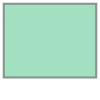

In [ ]:
polygon_square = Polygon(polygons[0])
polygon_square

In [ ]:
토지들만정렬 = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/용인시아파트토지만정렬.csv')

In [ ]:
# a = 아파트토지들 polygon tuple형태로 들어있는 리스트 
아파트토지들=[]
for j in tqdm(range(len(토지들만정렬['PYN_CN'].values))):
  b = []
  for i in range(len(eval(토지들만정렬['PYN_CN'].values[j])['coordinates'][0])):
    b.append( ( eval( 토지들만정렬['PYN_CN'].values[j] )['coordinates'][0][i][0],eval( 토지들만정렬['PYN_CN'].values[j] )['coordinates'][0][i][1] ) )
  아파트토지들.append(b)
len(아파트토지들)

100%|██████████| 1480/1480 [00:28<00:00, 51.74it/s] 


1480

In [ ]:
아파트토지들[0]

[(127.215145663581, 37.2858888306712),
 (127.215118745418, 37.2858487203357),
 (127.214889635598, 37.2860162746175),
 (127.214889601794, 37.2860162836887),
 (127.214933687933, 37.2861579272333),
 (127.214957705037, 37.286200989208),
 (127.21519840622, 37.286028899715),
 (127.215161639928, 37.285927735348),
 (127.215145663581, 37.2858888306712)]

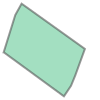

In [ ]:
Polygon(아파트토지들[0])

In [ ]:
# cell별 count와 중복되는 아파트 폴리곤만 뽑아내기 

In [ ]:
# j = cell 데이터프레임의 index번호
# i = 아파트토지들만 정렬의 index번호  

cell_index=[]

for i in tqdm(range(len(아파트토지들))):
  for j in range(len(polygons)):
    
    polygon_square = Polygon(polygons[j])  
    if polygon_square.overlaps(Polygon(아파트토지들[i])) == True:
      
      cell_index.append([i,j])
      



100%|██████████| 1480/1480 [10:30<00:00,  2.35it/s]


In [ ]:
within = cell_index
len(within) 

5553

In [ ]:
len(cell_index)

apt_idx=[]
cell_idx=[]

for i in range(len(cell_index)):
  apt_idx.append(cell_index[i][0])
for j in range(len(cell_index)):
  cell_idx.append(cell_index[j][1])

In [ ]:
len(set(apt_idx))

1276

### PNU코드 지번으로 바꾸기 

- 아파트별 경계를 폴리곤형태로 제공하는 데이터의 읍면동과 지번주소를 파악하기 위해 PNU코드를 지번으로 가공 
- 법정동코드와의 일치여부를 정규표현식 startswith로 확인 후 추출 

In [ ]:
# df_apt_idx = 아파트별 폴리곤 데이터 
df_apt_idx = df_apt_idx.drop([103, 104, 105, 106, 107, 108, 866, 1052])
df_apt_idx 

,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN


In [ ]:
# 지번데이터 불러오기 
import pandas as pd
지번txt = pd.read_csv('/content/gdrive/MyDrive/법정동코드 전체자료.txt', delimiter = '\t',encoding='cp949')
# 지번txt.loc[6338] = ['41','용인시','존재']
지번txt = 지번txt[지번txt['법정동명'].str.contains('용인시')]
지번txt = 지번txt[지번txt['폐지여부'] == '존재']
# 상세주소가 아닌 지역 drop 
지번txt = 지번txt.drop([6057,6190,6201,6211,6220,6230,6273,6286,6300,6311,6330])

지번txt

,법정동코드,법정동명,폐지여부
6191,4146110100,경기도 용인시 처인구 김량장동,존재
6192,4146110200,경기도 용인시 처인구 역북동,존재
6193,4146110300,경기도 용인시 처인구 삼가동,존재
6194,4146110400,경기도 용인시 처인구 남동,존재
6195,4146110500,경기도 용인시 처인구 유방동,존재
...,...,...,...
6333,4146510300,경기도 용인시 수지구 동천동,존재
6334,4146510400,경기도 용인시 수지구 고기동,존재
6335,4146510500,경기도 용인시 수지구 신봉동,존재
6336,4146510600,경기도 용인시 수지구 성복동,존재


In [ ]:
str법정동코드 = []
for i in range(len(지번txt['법정동코드'])):
  str법정동코드.append(str(지번txt['법정동코드'].values[i]))

지번txt['str법정동코드'] = str법정동코드
지번txt


,법정동코드,법정동명,폐지여부,str법정동코드
6191,4146110100,경기도 용인시 처인구 김량장동,존재,4146110100
6192,4146110200,경기도 용인시 처인구 역북동,존재,4146110200
6193,4146110300,경기도 용인시 처인구 삼가동,존재,4146110300
6194,4146110400,경기도 용인시 처인구 남동,존재,4146110400
6195,4146110500,경기도 용인시 처인구 유방동,존재,4146110500
...,...,...,...,...
6333,4146510300,경기도 용인시 수지구 동천동,존재,4146510300
6334,4146510400,경기도 용인시 수지구 고기동,존재,4146510400
6335,4146510500,경기도 용인시 수지구 신봉동,존재,4146510500
6336,4146510600,경기도 용인시 수지구 성복동,존재,4146510600


In [ ]:
strPNU = []
for i in range(len(df_apt_idx['PNU'])):
  strPNU.append(str(df_apt_idx['PNU'].values[i]))

df_apt_idx['strPNU'] = strPNU
df_apt_idx

,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID,strPNU
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN,4146125027103750002
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN,4146125027103750010
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN,4146125027103750011
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN,4146125027103750006
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN,4146125021101150002
...,...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN,4146510700100960003
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN,4146510700100960005
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN,4146510700100960006
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN,4146510700100960007


In [ ]:
법정동 = []
idx = []
for j in range(len(df_apt_idx['strPNU'])):
  for i in range(len(지번txt['str법정동코드'])): 
    if df_apt_idx['strPNU'].values[j].startswith(지번txt['str법정동코드'].values[i]):
      법정동.append(지번txt['법정동명'].values[i]) 
      idx.append(j)
df_apt_idx['법정동'] = 법정동
df_apt_idx


,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID,strPNU,법정동
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN,4146125027103750002,경기도 용인시 처인구 포곡읍 전대리
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN,4146125027103750010,경기도 용인시 처인구 포곡읍 전대리
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN,4146125027103750011,경기도 용인시 처인구 포곡읍 전대리
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN,4146125027103750006,경기도 용인시 처인구 포곡읍 전대리
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN,4146125021101150002,경기도 용인시 처인구 포곡읍 삼계리
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN,4146510700100960003,경기도 용인시 수지구 상현동
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN,4146510700100960005,경기도 용인시 수지구 상현동
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN,4146510700100960006,경기도 용인시 수지구 상현동
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN,4146510700100960007,경기도 용인시 수지구 상현동


In [ ]:
주번_부번 = []
for i in range(len(df_apt_idx['strPNU'])):
  주번_부번.append(df_apt_idx['strPNU'].values[i][-8:])

df_apt_idx['주번_부번'] = 주번_부번
아파트정보법정동입력= df_apt_idx[['Unnamed: 0','BLDID_ID','PNU','PYN_CN','LA','LO','법정동','주번_부번']]
아파트정보법정동입력=아파트정보법정동입력.rename(columns={'Unnamed: 0':'df_apt_idx'})
아파트정보법정동입력

,df_apt_idx,BLDID_ID,PNU,PYN_CN,LA,LO,법정동,주번_부번
0,0,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",37.286025,127.215044,경기도 용인시 처인구 포곡읍 전대리,03750002
1,1,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",37.285809,127.214861,경기도 용인시 처인구 포곡읍 전대리,03750010
2,2,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",37.286003,127.214605,경기도 용인시 처인구 포곡읍 전대리,03750011
3,3,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",37.286389,127.214296,경기도 용인시 처인구 포곡읍 전대리,03750006
4,4,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",37.296869,127.234921,경기도 용인시 처인구 포곡읍 삼계리,01150002
...,...,...,...,...,...,...,...,...
1271,1475,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.310262,127.080135,경기도 용인시 수지구 상현동,00960003
1272,1476,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",37.310453,127.080587,경기도 용인시 수지구 상현동,00960005
1273,1477,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.309871,127.080385,경기도 용인시 수지구 상현동,00960006
1274,1478,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",37.310095,127.080884,경기도 용인시 수지구 상현동,00960007


In [ ]:
df_cell_idx

,Unnamed: 0,cell_id,cust_each_cell,cell_xcrd,cell_ycrd,bounds,count_bins,apt_idx
0,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,0
1,10147,87910921,17.788,127.21487,37.285564,"[(37.285788829755056, 127.21515258342954), (37...",two,1
2,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,1
3,10147,87910921,17.788,127.21487,37.285564,"[(37.285788829755056, 127.21515258342954), (37...",two,2
4,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,2
...,...,...,...,...,...,...,...,...
5548,7679,84103214,3.801,127.08048,37.309956,"[(37.31018082975476, 127.08076267508298), (37....",one,1477
5549,1322,84119213,14.109,127.08105,37.309956,"[(37.31018082975476, 127.08133267508299), (37....",one,1478
5550,7679,84103214,3.801,127.08048,37.309956,"[(37.31018082975476, 127.08076267508298), (37....",one,1478
5551,7680,84103215,58.777,127.08048,37.310406,"[(37.310630829754764, 127.08076267677491), (37...",three,1478


In [ ]:
conc = df_cell_idx[['apt_idx','cust_each_cell']] 

apt_id = list(conc['apt_idx'].drop_duplicates(keep='first'))

len(apt_id)


1276

In [ ]:
dup = conc[conc['apt_idx'] == 1478]
sum(dup['cust_each_cell'])


76.68699999999998

In [ ]:
dp=[]
for i in apt_id:
  dup = conc[conc['apt_idx'] == i]
  dp.append(sum(dup['cust_each_cell']))

len(dp)
min(dp)

3.058

In [ ]:
df_idx = pd.DataFrame([ x for x in zip(apt_id,dp)])
df_idx.columns = ['df_apt_idx', 'cust_each_cell']
df_idx

,df_apt_idx,cust_each_cell
0,0,10.560
1,1,28.348
2,2,28.348
3,3,693.466
4,4,92.637
...,...,...
1271,1475,527.314
1272,1476,69.337
1273,1477,36.436
1274,1478,76.687


In [ ]:
법정동주소로아파트명조사 = pd.merge(아파트정보법정동입력, df_idx, on = 'df_apt_idx', how = 'left')
법정동주소로아파트명조사.to_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/법정동주소로아파트명조사.csv')

In [ ]:
법정동주소로아파트명조사

,df_apt_idx,BLDID_ID,PNU,PYN_CN,LA,LO,법정동,주번_부번,cust_each_cell
0,0,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",37.286025,127.215044,경기도 용인시 처인구 포곡읍 전대리,03750002,10.560
1,1,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",37.285809,127.214861,경기도 용인시 처인구 포곡읍 전대리,03750010,28.348
2,2,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",37.286003,127.214605,경기도 용인시 처인구 포곡읍 전대리,03750011,28.348
3,3,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",37.286389,127.214296,경기도 용인시 처인구 포곡읍 전대리,03750006,693.466
4,4,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",37.296869,127.234921,경기도 용인시 처인구 포곡읍 삼계리,01150002,92.637
...,...,...,...,...,...,...,...,...,...
1263,1475,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.310262,127.080135,경기도 용인시 수지구 상현동,00960003,527.314
1264,1476,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",37.310453,127.080587,경기도 용인시 수지구 상현동,00960005,69.337
1265,1477,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.309871,127.080385,경기도 용인시 수지구 상현동,00960006,36.436
1266,1478,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",37.310095,127.080884,경기도 용인시 수지구 상현동,00960007,76.687


### 용인시 행정동별 전기차 수 카운트

용인시 구별 차량대수와 전기차 대수 , 읍면동별 차량대수 데이터를 활용해서 각 구별 비율을 통해 동별 전기차대수를 추정 

2020년, 2021년 별로 추정한 전기차대수를 통해 연간 읍면동별 전기차대수 증가량을 도출 

In [ ]:
# 용인시 구별 전기차 대수 () / 용인시 구별 차량 대수 ( ) * 용인시 읍면동별 차량 대수 ( ) 
#  = 용인시 읍면동별 전기차 대수 (2020/ 2021년데이터  를 비교해서 증가량 산출 )

In [ ]:
df_ev = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/backup/경기도 전기차 수.csv', encoding='cp949')
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수
0,2020,부천시,하이브리드(휘발유+전기),사업용,18,0,0,0
1,2020,부천시,휘발유,비사업용,52904,23,151,0
2,2020,부천시,휘발유,사업용,116,0,0,0
3,2020,부천시,휘발유(무연),비사업용,95700,44,46,0
4,2020,부천시,휘발유(무연),사업용,714,0,0,0
...,...,...,...,...,...,...,...,...
2588,2019,고양시 일산서구,엘피지,사업용,1543,2,78,0
2589,2019,고양시 일산서구,전기,비사업용,249,0,0,0
2590,2019,고양시 일산서구,전기,사업용,2,0,0,0
2591,2019,고양시 일산서구,하이브리드(LPG+전기),비사업용,78,0,0,0


In [ ]:
# 용인시 구별 전기차수 (2019,2020,2021)

df_ev = df_ev[(df_ev['시군구명']== '용인시 수지구') | (df_ev['시군구명']== '용인시 기흥구') |  (df_ev['시군구명']== '용인시 처인구')]

df_ev = df_ev[df_ev['연료별'] == '전기']


df_ev = df_ev[df_ev['등록연도'] > 2019]
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수
1154,2021,용인시 처인구,전기,비사업용,673,8,164,0
1155,2021,용인시 처인구,전기,사업용,5,11,79,0
1175,2021,용인시 기흥구,전기,비사업용,1167,6,80,2
1176,2021,용인시 기흥구,전기,사업용,394,7,77,0
1196,2021,용인시 수지구,전기,비사업용,995,1,29,0
1197,2021,용인시 수지구,전기,사업용,5,0,30,0
1562,2020,용인시 처인구,전기,비사업용,498,0,32,0
1563,2020,용인시 처인구,전기,사업용,1,0,8,0
1582,2020,용인시 기흥구,전기,비사업용,717,1,18,0
1583,2020,용인시 기흥구,전기,사업용,2,1,9,0


In [ ]:
a= []
for i in df_ev.values:
  a.append(sum(i[-4:-1]))

df_ev['sum'] = a

In [ ]:
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수,sum
1154,2021,용인시 처인구,전기,비사업용,673,8,164,0,845
1155,2021,용인시 처인구,전기,사업용,5,11,79,0,95
1175,2021,용인시 기흥구,전기,비사업용,1167,6,80,2,1253
1176,2021,용인시 기흥구,전기,사업용,394,7,77,0,478
1196,2021,용인시 수지구,전기,비사업용,995,1,29,0,1025
1197,2021,용인시 수지구,전기,사업용,5,0,30,0,35
1562,2020,용인시 처인구,전기,비사업용,498,0,32,0,530
1563,2020,용인시 처인구,전기,사업용,1,0,8,0,9
1582,2020,용인시 기흥구,전기,비사업용,717,1,18,0,736
1583,2020,용인시 기흥구,전기,사업용,2,1,9,0,12


In [ ]:
# 구별 자동차 총 등록대수 (2021 6월, 2020 6월)

# 기흥구 = 195084     192204
# 수지구 = 148693     144768
# 처인구 = 141301     135385


# 구별 전기차 수

#       2021 2020
# 기흥구 1731 571
# 수지구 1060 748
# 처인구 940  539

In [ ]:
# 구별 전체차량대비 전기차대수의 비율 

print('기흥구2021:', 1731/195084)
print('수지구2021:', 1060 / 148693)
print('처인구2021:', 940/141301)
print()
print('기흥구2020:', 571/192204)
print('수지구2020:', 748/144768)
print('처인구2020:', 539/135385)

기흥구2021: 0.008873100818109122
수지구2021: 0.00712878212155246
처인구2021: 0.006652465304562601

기흥구2020: 0.00297080185636095
수지구2020: 0.005166887709991158
처인구2020: 0.003981238689662814


In [ ]:
# 법정동별 차량대수

df_addr = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동별 총 전기 자동차 대수 모음/법정동별자동차등록대수(2020,2021) .xls - Sheet1.csv')



In [ ]:
df_addr['법정동'] = df_addr['Unnamed: 0']
df_addr['시군구'] = ''

df_addr = df_addr.drop('Unnamed: 0', axis=1)

df_addr

,2021 06,2020 06,법정동,시군구
0,17305.0,16570.0,포곡읍,
1,15838.0,14785.0,모현읍,
2,12554.0,12044.0,이동읍,
3,13520.0,12958.0,남사읍,
4,5668.0,5556.0,원삼면,
5,6391.0,6236.0,백암면,
6,12444.0,11612.0,양지면,
7,9270.0,8950.0,김량장동,
8,3466.0,3310.0,남동,
9,13920.0,13345.0,역북동,


In [ ]:
for i in range(17):
  df_addr['시군구'][i] = '용인시 처인구'

for i in range(18,36):
  df_addr['시군구'][i] = '용인시 기흥구'

for i in range(37,44):
  df_addr['시군구'][i] = '용인시 수지구'

df_addr = df_addr.dropna()
df_addr = df_addr.reset_index()
df_addr = df_addr.drop('index',axis=1)
df_addr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2021 06,2020 06,법정동,시군구
0,17305.0,16570.0,포곡읍,용인시 처인구
1,15838.0,14785.0,모현읍,용인시 처인구
2,12554.0,12044.0,이동읍,용인시 처인구
3,13520.0,12958.0,남사읍,용인시 처인구
4,5668.0,5556.0,원삼면,용인시 처인구
5,6391.0,6236.0,백암면,용인시 처인구
6,12444.0,11612.0,양지면,용인시 처인구
7,9270.0,8950.0,김량장동,용인시 처인구
8,3466.0,3310.0,남동,용인시 처인구
9,13920.0,13345.0,역북동,용인시 처인구


In [ ]:
# 시군구 전기차 비율 

기흥구_2021 = 1731/195084
수지구_2021= 1060 / 148693
처인구_2021= 940/141301

기흥구_2020= 571/192204
수지구_2020= 748/144768
처인구_2020= 539/135385

In [ ]:
#2021 동별 전기차 

처인구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 처인구'].values)):
  처인구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 처인구'].values[i][0] ) * (처인구_2021) )

기흥구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 기흥구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 기흥구'].values[i][0] ) * (기흥구_2021) )

수지구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 수지구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 수지구'].values[i][0] ) * (수지구_2021) )

In [ ]:
동별전기차대수 = 처인구동별전기차대수 + 기흥구동별전기차대수 + 수지구동별전기차대수 

df_addr['2021동별전기차대수'] = 동별전기차대수

In [ ]:
처인구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 처인구'].values)):
  처인구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 처인구'].values[i][1] ) * (처인구_2020) )

기흥구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 기흥구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 기흥구'].values[i][1] ) * (기흥구_2020) )

수지구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 수지구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 수지구'].values[i][1] ) * (수지구_2020) )

In [ ]:
동별전기차대수 = 처인구동별전기차대수 + 기흥구동별전기차대수 + 수지구동별전기차대수 

df_addr['2020동별전기차대수'] = 동별전기차대수

In [ ]:
증감량 = []
for i,j in zip(df_addr['2020동별전기차대수'], df_addr['2021동별전기차대수']):
  증감량.append(j - i)

df_addr['증감량'] = 증감량

In [ ]:
# 법정동별 전기차대수와 증감량 데이터 
df_addr= df_addr[['시군구','법정동','2020동별전기차대수','2021동별전기차대수','증감량']]
df_addr

,시군구,법정동,2020동별전기차대수,2021동별전기차대수,증감량
0,용인시 처인구,포곡읍,65.969125,115.120912,49.151787
1,용인시 처인구,모현읍,58.862614,105.361745,46.499131
2,용인시 처인구,이동읍,47.950039,83.515049,35.565011
3,용인시 처인구,남사읍,51.588891,89.941331,38.352440
4,용인시 처인구,원삼면,22.119762,37.706173,15.586411
5,용인시 처인구,백암면,24.827004,42.515906,17.688901
6,용인시 처인구,양지면,46.230144,82.783278,36.553135
7,용인시 처인구,김량장동,35.632086,61.668353,26.036267
8,용인시 처인구,남동,13.177900,23.057445,9.879545
9,용인시 처인구,역북동,53.129630,92.602317,39.472687


In [ ]:
# df_addr.to_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동별.../법정동전기차대수(2020,2021).csv')

### 데이터 로드해서 회귀분석 1 (거주지 읍면동별 수요지수 도출) + 거주지 읍면동별 수요지수 계산

거주지 읍면동별 현재수요(count_cust)와 잠재수요에 대한 회귀를 통해 거주지의 읍면동별 수요지수 도출  

잠재수요 Y (읍면동별 전기차 증가량) 과 Xs (거주인구수	1인가구 수	면적당 아파트 가격	공시지가	학원 수	보육시설 대비 아동 수	차량수	유소년	연봉)과의 회귀를 통해 주요영향변수를 도출하고 도출된 변수를 바탕으로 각 변수를 가중치로 사용하는 잠재수요지수 계산식 도출 

In [ ]:
# 거주지 완속 현재 + / 잠재수요 회귀 

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df_res = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/거주지수요지수산출용 (1) -2.csv')
df_res = df_res[['행정동','거주인구수'	,'1인가구 수'	,'면적당 아파트 가격',	'공시지가',	'학원 수',	'보육시설 대비 아동 수',	'차량수',	'유소년'	,'연봉'	,'전기차증가량']]
df_res

,행정동,거주인구수,1인가구 수,면적당 아파트 가격,공시지가,학원 수,보육시설 대비 아동 수,차량수,유소년,연봉,전기차증가량
0,동천동,50740,19496,7824870.05,966606.48,142,74.00,21551.000000,8225,3409.50,45.448089
1,풍덕천1동,36470,15865,7920457.43,2222995.82,106,40.70,13372.944290,4498,3306.00,26.653968
2,풍덕천2동,41131,14954,8827759.42,2282322.31,251,56.54,15082.055710,7894,3306.00,30.060443
3,신봉동,38413,13977,6449613.79,1103420.09,168,46.68,15465.000000,6759,3315.00,31.709922
4,죽전1동,57037,21372,5851875.46,1988940.69,229,45.36,21272.225250,8440,3363.00,42.745876
5,죽전2동,18385,7724,7481606.40,2283492.96,50,44.18,6856.774747,2209,3363.00,13.778476
6,성복동,54775,18816,5634161.23,1151700.32,110,106.52,22560.000000,9568,3416.00,55.069467
7,상현1동,48165,17828,6711425.52,2474067.92,143,59.22,19284.850340,8196,3643.00,39.439757
8,상현2동,33088,11493,5975016.35,1702908.45,160,55.47,13248.149660,5607,3643.00,27.094003
9,동백2동,27170,9362,4438707.94,1262682.36,163,36.31,10776.552710,5110,3449.00,64.471354


In [ ]:
# 행정동명을 제거한 테이블 만들고 
df_res = df_res.drop(['행정동'],axis=1,inplace=False)

In [ ]:
# 클러스터링에서 나온 결과동만 추리기
# ['포곡읍','역삼동','신갈동','구갈동','구성동','보정동','죽전1동','동천동','상현1동','성복동']
# df_res = df_res[(df_res['행정동'] == '포곡읍') | (df_res['행정동'] == '역삼동') | (df_res['행정동'] == '신갈동') | (df_res['행정동'] == '구갈동') | (df_res['행정동'] == '구성동') | (df_res['행정동'] == '보정동') | (df_res['행정동'] == '죽전1동') | (df_res['행정동'] == '동천동') | (df_res['행정동'] == '상현1동') |(df_res['행정동'] == '성복동')]
# df_res

In [ ]:
# data scaling

# min-max scale
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(df_res)
columns = df_res.columns
df_scaled = pd.DataFrame(scaled,columns=columns)
df_scaled

,거주인구수,1인가구 수,면적당 아파트 가격,공시지가,학원 수,보육시설 대비 아동 수,차량수,유소년,연봉,전기차증가량
0,0.869878,0.891904,0.863681,0.345810,0.555102,0.613087,0.941211,0.852563,0.161972,0.337285
1,0.575001,0.682685,0.876674,0.891043,0.408163,0.216895,0.464717,0.443408,0.000000,0.137125
2,0.671316,0.630193,1.000000,0.916789,1.000000,0.405354,0.564299,0.816226,0.000000,0.173405
3,0.615151,0.573898,0.676747,0.405183,0.661224,0.288043,0.586611,0.691624,0.014085,0.190972
4,1.000000,1.000000,0.595498,0.789470,0.910204,0.272338,0.924968,0.876166,0.089202,0.308506
5,0.201289,0.213598,0.817022,0.917297,0.179592,0.258299,0.085054,0.192118,0.089202,0.000000
6,0.953258,0.852723,0.565905,0.426135,0.424490,1.000000,1.000000,1.000000,0.172144,0.439753
7,0.816668,0.795794,0.712334,1.000000,0.559184,0.437240,0.809174,0.849380,0.527387,0.273295
8,0.505114,0.430769,0.612236,0.665342,0.628571,0.392623,0.457446,0.565155,0.527387,0.141812
9,0.382824,0.307980,0.403411,0.474298,0.640816,0.164664,0.313439,0.510594,0.223787,0.539884


In [ ]:
#종속변수와 독립변수들간의 상관관계 확인 
df_scaled.corr()

,거주인구수,1인가구 수,면적당 아파트 가격,공시지가,학원 수,보육시설 대비 아동 수,차량수,유소년,연봉,전기차증가량
거주인구수,1.000000,0.975580,0.585730,0.491586,0.761436,0.510602,0.935496,0.942249,-0.384148,0.340097
1인가구 수,0.975580,1.000000,0.551112,0.468598,0.695541,0.488697,0.934772,0.866496,-0.395265,0.339916
면적당 아파트 가격,0.585730,0.551112,1.000000,0.840942,0.701685,0.422482,0.389569,0.640893,-0.346606,0.125048
공시지가,0.491586,0.468598,0.840942,1.000000,0.641549,0.171936,0.260774,0.485094,-0.287211,0.145462
학원 수,0.761436,0.695541,0.701685,0.641549,1.000000,0.220732,0.622401,0.794411,-0.358095,0.258944
보육시설 대비 아동 수,0.510602,0.488697,0.422482,0.171936,0.220732,1.000000,0.505076,0.570532,-0.135615,0.066788
차량수,0.935496,0.934772,0.389569,0.260774,0.622401,0.505076,1.000000,0.855031,-0.203809,0.393200
유소년,0.942249,0.866496,0.640893,0.485094,0.794411,0.570532,0.855031,1.000000,-0.324546,0.333009
연봉,-0.384148,-0.395265,-0.346606,-0.287211,-0.358095,-0.135615,-0.203809,-0.324546,1.000000,0.115550
전기차증가량,0.340097,0.339916,0.125048,0.145462,0.258944,0.066788,0.393200,0.333009,0.115550,1.000000


In [ ]:
y_target = df_scaled['전기차증가량']
X_data = df_scaled.drop(['전기차증가량'], axis=1, inplace=False)

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# 고려한 모델들  
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

In [ ]:
# 모델별로 5번 cross_val해서 평균 낸 RMSE
models = [lr_reg,dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  LinearRegression  #####
 5 교차 검증의 평균 RMSE : 0.462 
#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.386 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.289 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.309 
[20:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 0.312 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 0.297 


#### model 별 feature importance 시각화

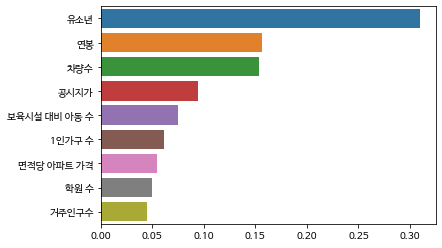

In [ ]:
import seaborn as sns
%matplotlib inline

# Random Forest Regressor 

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
#Permutation importance of RF

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_reg,random_state=0).fit(X_data,y_target)
eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
0.3829 ± 0.1357,유소년
0.2023 ± 0.0452,연봉
0.1287 ± 0.0964,차량수
0.0805 ± 0.0236,공시지가
0.0676 ± 0.0482,보육시설 대비 아동 수
0.0488 ± 0.0259,1인가구 수
0.0431 ± 0.0086,면적당 아파트 가격
0.0408 ± 0.0159,학원 수
0.0247 ± 0.0090,거주인구수


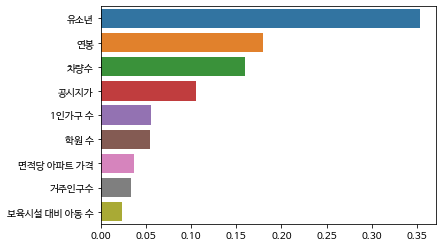

In [ ]:
# GB regressor 

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
gb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=gb_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
#Permutation importance of GB
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gb_reg,random_state=0).fit(X_data,y_target)
eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
0.3339 ± 0.0547,유소년
0.1956 ± 0.0592,연봉
0.1454 ± 0.1273,차량수
0.1250 ± 0.0335,학원 수
0.0900 ± 0.0429,1인가구 수
0.0657 ± 0.0199,공시지가
0.0186 ± 0.0142,보육시설 대비 아동 수
0.0128 ± 0.0071,면적당 아파트 가격
0.0093 ± 0.0025,거주인구수


[20:17:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


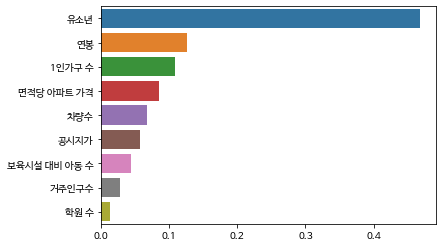

In [ ]:
# XGB regressor 

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
xgb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=xgb_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
#Permutation importance of XGB
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_reg,random_state=0).fit(X_data,y_target)
eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
0.3728 ± 0.3537,차량수
0.3314 ± 0.0419,유소년
0.1272 ± 0.0480,연봉
0.1165 ± 0.0294,면적당 아파트 가격
0.0855 ± 0.0123,공시지가
0.0404 ± 0.0104,거주인구수
0.0355 ± 0.0275,보육시설 대비 아동 수
0.0145 ± 0.0086,1인가구 수
0.0011 ± 0.0007,학원 수


#### 거주지 읍면동별 수요지수 계산 


In [ ]:
# feature importance 기반으로 점수식 만들기

# 유소년 / 연봉 / 차량수 세가지 고려

# 0.3829 / 0.3829	유소년
# 0.2023 / 0.3829	연봉
# 0.1287 / 0.3829	차량수

유소년w = 0.3829 / 0.3829
연봉w = 0.2023 / 0.3829
차량수w = 0.1287 / 0.3829

In [ ]:
# 데이터프레임에서 세가지 변수만 추출
df_수요지수 = df_scaled[['유소년','연봉','차량수']]
# df_수요지수[['유소년']] * (유소년w) * 1 + df_수요지수[['연봉']] *  (연봉w) * 1 + df_수요지수[['차량수']] * 차량수w * 1

유소년w = 0.3829 / 0.3829
연봉w = 0.2023 / 0.3829
차량수w = 0.1287 / 0.3829

잠재수요지수 = []
for i in range(len(df_수요지수)):
  잠재수요지수.append( ( df_수요지수.values[i][0] * 유소년w ) + ( df_수요지수.values[i][1] * 연봉w ) + ( df_수요지수.values[i][2] * 차량수w ) )

len(잠재수요지수)

35

In [ ]:
df_수요지수['잠재수요지수'] = 잠재수요지수
df_res = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/거주지수요지수산출용 (1) -2.csv')


df_수요지수['행정동'] = df_res['행정동']


df_수요지수

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,유소년,연봉,차량수,잠재수요지수,행정동
0,0.852563,0.161972,0.941211,1.254498,동천동
1,0.443408,0.000000,0.464717,0.599608,풍덕천1동
2,0.816226,0.000000,0.564299,1.005897,풍덕천2동
3,0.691624,0.014085,0.586611,0.896236,신봉동
4,0.876166,0.089202,0.924968,1.234194,죽전1동
5,0.192118,0.089202,0.085054,0.267834,죽전2동
6,1.000000,0.172144,1.000000,1.427069,성복동
7,0.849380,0.527387,0.809174,1.399996,상현1동
8,0.565155,0.527387,0.457446,0.997549,상현2동
9,0.510594,0.223787,0.313439,0.734182,동백2동


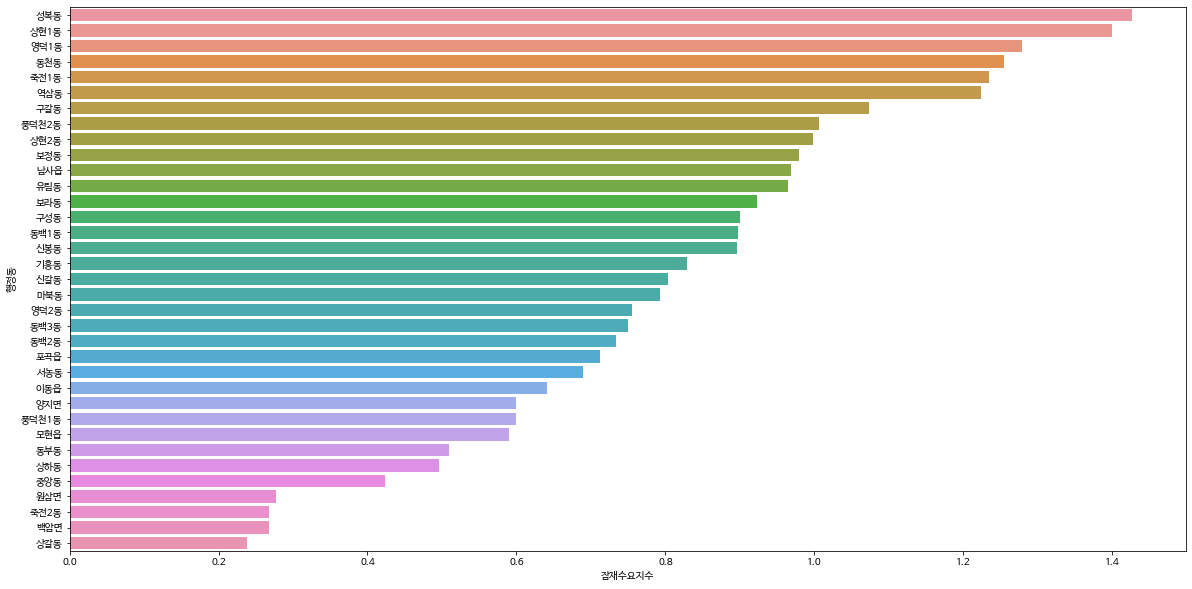

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
순위대로정렬 = df_수요지수.sort_values('잠재수요지수', ascending=False)

sns.barplot(x=순위대로정렬['잠재수요지수'], y=순위대로정렬['행정동'])

In [ ]:
# count_cust 현재수요 합치기
import pandas as pd
df_현재수요 = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동 빅콘count모음/읍면동별count_cust빅콘1번.csv')
df_현재수요

,Unnamed: 0,행정동,cust_each_cell
0,11,성복동,103420.254
1,2,죽전1동,98960.946
2,5,동천동,95293.624
3,3,역삼동,83327.567
4,14,상현1동,80829.972
5,6,구갈동,76355.630
6,13,신봉동,73854.709
7,15,풍덕천2동,71517.848
8,7,구성동,70373.600
9,20,풍덕천1동,67523.901


In [ ]:
df_거주지수요지수 = pd.merge(df_현재수요, df_수요지수, on = '행정동', how = 'right')
df_거주지수요지수 = df_거주지수요지수.rename(columns = {'cust_each_cell':'현재수요count'})
df_거주지수요지수 = df_거주지수요지수[['행정동','유소년','연봉','차량수','현재수요count','잠재수요지수']]

#현재수요 min_max scaling 


minMaxScaler = MinMaxScaler()
scaled_count = minMaxScaler.fit_transform(df_거주지수요지수[['현재수요count']])
df_거주지수요지수['현재수요지수'] = scaled_count
df_거주지수요지수




,행정동,유소년,연봉,차량수,현재수요count,잠재수요지수,현재수요지수
0,동천동,0.852563,0.161972,0.941211,95293.624,1.254498,0.914396
1,풍덕천1동,0.443408,0.000000,0.464717,67523.901,0.599608,0.621876
2,풍덕천2동,0.816226,0.000000,0.564299,71517.848,1.005897,0.663947
3,신봉동,0.691624,0.014085,0.586611,73854.709,0.896236,0.688563
4,죽전1동,0.876166,0.089202,0.924968,98960.946,1.234194,0.953027
5,죽전2동,0.192118,0.089202,0.085054,38315.322,0.267834,0.314199
6,성복동,1.000000,0.172144,1.000000,103420.254,1.427069,1.000000
7,상현1동,0.849380,0.527387,0.809174,80829.972,1.399996,0.762039
8,상현2동,0.565155,0.527387,0.457446,65324.381,0.997549,0.598707
9,동백2동,0.510594,0.223787,0.313439,44339.944,0.734182,0.377661


In [ ]:
잠재순위  = df_거주지수요지수.sort_values('잠재수요지수',ascending=False)
잠재순위['잠재수요순위'] = list(range(1,36))
현재순위=잠재순위.sort_values('현재수요지수',ascending=False)
현재순위['현재수요순위'] = list(range(1,36))

현재순위 = 현재순위.sort_index()
현재순위

,행정동,유소년,연봉,차량수,현재수요count,잠재수요지수,현재수요지수,잠재수요순위,현재수요순위
0,동천동,0.852563,0.161972,0.941211,95293.624,1.254498,0.914396,4,3
1,풍덕천1동,0.443408,0.000000,0.464717,67523.901,0.599608,0.621876,27,10
2,풍덕천2동,0.816226,0.000000,0.564299,71517.848,1.005897,0.663947,8,8
3,신봉동,0.691624,0.014085,0.586611,73854.709,0.896236,0.688563,16,7
4,죽전1동,0.876166,0.089202,0.924968,98960.946,1.234194,0.953027,5,2
5,죽전2동,0.192118,0.089202,0.085054,38315.322,0.267834,0.314199,33,27
6,성복동,1.000000,0.172144,1.000000,103420.254,1.427069,1.000000,1,1
7,상현1동,0.849380,0.527387,0.809174,80829.972,1.399996,0.762039,2,5
8,상현2동,0.565155,0.527387,0.457446,65324.381,0.997549,0.598707,9,13
9,동백2동,0.510594,0.223787,0.313439,44339.944,0.734182,0.377661,22,21


In [ ]:
순위점수합 = []
for i in range(len(현재순위)):
  순위점수합.append(현재순위['잠재수요순위'][i] + 현재순위['현재수요순위'][i])

현재순위['순위점수합'] = 순위점수합
현재순위
최종_거주지수요점수 = 현재순위.sort_values('순위점수합')


In [ ]:
최종_거주지수요점수['최종순위'] = list(range(1,36))
최종_거주지수요점수

,행정동,유소년,연봉,차량수,현재수요count,잠재수요지수,현재수요지수,잠재수요순위,현재수요순위,순위점수합,최종순위
6,성복동,1.000000,0.172144,1.000000,103420.254,1.427069,1.000000,1,1,2,1
0,동천동,0.852563,0.161972,0.941211,95293.624,1.254498,0.914396,4,3,7,2
7,상현1동,0.849380,0.527387,0.809174,80829.972,1.399996,0.762039,2,5,7,3
4,죽전1동,0.876166,0.089202,0.924968,98960.946,1.234194,0.953027,5,2,7,4
34,역삼동,0.730596,0.374022,0.877702,83327.567,1.223218,0.788348,6,4,10,5
20,구갈동,0.588978,0.453834,0.728427,76355.630,1.073593,0.714907,7,6,13,6
2,풍덕천2동,0.816226,0.000000,0.564299,71517.848,1.005897,0.663947,8,8,16,7
8,상현2동,0.565155,0.527387,0.457446,65324.381,0.997549,0.598707,9,13,22,8
21,구성동,0.608080,0.147105,0.638292,70373.600,0.900343,0.651894,14,9,23,9
3,신봉동,0.691624,0.014085,0.586611,73854.709,0.896236,0.688563,16,7,23,10


In [ ]:
# 거주지 읍면동 수요지수 순위 수정 
거주지읍면동 = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/결과물/읍면동_거주지_수요점수.csv')
거주지읍면동

,Unnamed: 0,행정동,유소년,연봉,차량수,현재수요count,잠재수요지수,현재수요지수,잠재수요순위,현재수요순위,순위점수합,최종순위
0,6,성복동,1.000000,0.172144,1.000000,103420.254,1.427069,1.000000,1,1,2,1
1,0,동천동,0.852563,0.161972,0.941211,95293.624,1.254498,0.914396,4,3,7,2
2,7,상현1동,0.849380,0.527387,0.809174,80829.972,1.399996,0.762039,2,5,7,2
3,4,죽전1동,0.876166,0.089202,0.924968,98960.946,1.234194,0.953027,5,2,7,2
4,34,역삼동,0.730596,0.374022,0.877702,83327.567,1.223218,0.788348,6,4,10,5
5,20,구갈동,0.588978,0.453834,0.728427,76355.630,1.073593,0.714907,7,6,13,6
6,2,풍덕천2동,0.816226,0.000000,0.564299,71517.848,1.005897,0.663947,8,8,16,7
7,8,상현2동,0.565155,0.527387,0.457446,65324.381,0.997549,0.598707,9,13,22,8
8,21,구성동,0.608080,0.147105,0.638292,70373.600,0.900343,0.651894,14,9,23,9
9,3,신봉동,0.691624,0.014085,0.586611,73854.709,0.896236,0.688563,16,7,23,9


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(거주지읍면동[['잠재수요지수']])
거주지읍면동['잠재수요지수scaled'] = scaled
거주지읍면동['최종수요지수합']=거주지읍면동['현재수요지수'] + 거주지읍면동['잠재수요지수scaled']
scaled= minMaxScaler.fit_transform(거주지읍면동[['최종수요지수합']])
거주지읍면동['최종수요지수합scaled'] = scaled
거주지읍면동

,Unnamed: 0,행정동,유소년,연봉,차량수,현재수요count,잠재수요지수,현재수요지수,잠재수요순위,현재수요순위,순위점수합,최종순위,잠재수요지수scaled,최종수요지수합,최종수요지수합scaled
0,6,성복동,1.000000,0.172144,1.000000,103420.254,1.427069,1.000000,1,1,2,1,1.000000,2.000000,1.000000
1,0,동천동,0.852563,0.161972,0.941211,95293.624,1.254498,0.914396,4,3,7,2,0.854852,1.769248,0.883181
2,7,상현1동,0.849380,0.527387,0.809174,80829.972,1.399996,0.762039,2,5,7,2,0.977229,1.739268,0.868004
3,4,죽전1동,0.876166,0.089202,0.924968,98960.946,1.234194,0.953027,5,2,7,2,0.837775,1.790802,0.894092
4,34,역삼동,0.730596,0.374022,0.877702,83327.567,1.223218,0.788348,6,4,10,5,0.828543,1.616891,0.806049
5,20,구갈동,0.588978,0.453834,0.728427,76355.630,1.073593,0.714907,7,6,13,6,0.702695,1.417602,0.705159
6,2,풍덕천2동,0.816226,0.000000,0.564299,71517.848,1.005897,0.663947,8,8,16,7,0.645756,1.309703,0.650535
7,8,상현2동,0.565155,0.527387,0.457446,65324.381,0.997549,0.598707,9,13,22,8,0.638735,1.237442,0.613952
8,21,구성동,0.608080,0.147105,0.638292,70373.600,0.900343,0.651894,14,9,23,9,0.556975,1.208869,0.599487
9,3,신봉동,0.691624,0.014085,0.586611,73854.709,0.896236,0.688563,16,7,23,9,0.553521,1.242084,0.616302


### 데이터 로드해서 회귀분석 2 (활동지 읍면동별 수요지수 도출) + 활동지 읍면동별 수요지수계산

####기본 설치

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  


In [ ]:
#패키지 불러오기
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [ ]:
# 활동지 완속 현재 + / 잠재수요 회귀 

In [ ]:
#활동지 현재수요
dfb_2=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동 빅콘count모음/활동지count_cust빅콘2번.csv',index_col=0)
dfb_3=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동 빅콘count모음/활동지count_cust빅콘3번(용인시내만).csv',index_col=0)
dfb_23=pd.merge(dfb_2,dfb_3,on='행정동')
dfb_23['현재수요지수']=dfb_23['cust_each_cell_x']+dfb_23['cust_each_cell_y']
dfb_23 = dfb_23.drop(['cust_each_cell_x'],axis=1,inplace=False)
dfb_23 = dfb_23.drop(['cust_each_cell_y'],axis=1,inplace=False)
#활동지 잠재수요
df_res = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/활동지수요산출용 (1).csv')
df2=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/거주지수요지수산출용 (1) -2.csv')
df_res['행정동']=df_res['행정읍면동']
df_res.drop(['행정읍면동'],axis=1,inplace=True)
df3 = pd.merge(df_res,df2,on='행정동')
# 행정동명을 제거한 테이블 만들고 
dfd=df3[['행정동']]
df3 = df3.drop(['행정동'],axis=1,inplace=False)
#회귀용 테이블 생성
df3 = df3.drop(['공시지가'],axis=1,inplace=False)
df3 = df3.drop(['면적당 아파트 가격'],axis=1,inplace=False)
df3 = df3.drop(['보육시설 대비 아동 수'],axis=1,inplace=False)
df3 = df3.drop(['학원 수'],axis=1,inplace=False)
df3 = df3.drop(['유소년'],axis=1,inplace=False)
df3 = df3.drop(['연봉'],axis=1,inplace=False)
df3 = df3.drop(['전기차증가량'],axis=1,inplace=False)
df3 = df3.drop(['차량수'],axis=1,inplace=False)
df3 = df3.drop(['거주인구수'],axis=1,inplace=False)
df3 = df3.drop(['1인가구 수'],axis=1,inplace=False)
df3 = df3.drop(['공동주택비율'],axis=1,inplace=False)
df3 = df3.drop(['노후주택비율'],axis=1,inplace=False)
df3 = df3.drop(['단독주택비율'],axis=1,inplace=False)
df_res = df3.drop(['주거면적(제곱미터)'],axis=1,inplace=False)

df_res['문화쇼핑시설 수'] = df_res['쇼핑시설 수']+df_res['문화시설 수']
df_res['체육편의시설 수'] = df_res['체육시설 수']+df_res['편의시설 수']
df_res = df_res.drop(['쇼핑시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['문화시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['외식시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['잡화점 수'],axis=1,inplace=False)
df_res = df_res.drop(['체육시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['편의시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['녹지비율'],axis=1,inplace=False)

df_res

,2020총OD,2019총OD,변화량,유동인구,기업체 수,상권유무,대규모 점포 수,문화쇼핑시설 수,체육편의시설 수
0,191612.88700,181629.00000,9983.887000,5453,2572,1,1,53,63
1,109887.81500,111676.00000,-1788.185000,6302,1248,0,1,29,28
2,139254.81300,127630.00000,11624.813000,7532,1248,0,5,23,15
3,90204.45300,79461.00000,10743.453000,7075,1375,0,0,28,18
4,80202.44791,78877.50896,1324.938947,4847,722,0,2,14,9
5,94134.87232,92579.77068,1555.101645,5689,2112,1,0,25,52
6,56557.03877,55622.72037,934.318408,3418,416,0,0,11,9
7,70292.07500,68420.00000,1872.075000,3222,1122,0,0,23,22
8,126770.75600,116368.00000,10402.756000,6733,1983,0,0,46,47
9,116910.53700,118965.00000,-2054.463000,6502,944,0,0,33,26


In [ ]:
# data scaling

# min-max scale
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(df_res)
columns = df_res.columns
df_scaled = pd.DataFrame(scaled,columns=columns)
df_scaled.corr()

,2020총OD,2019총OD,변화량,유동인구,기업체 수,상권유무,대규모 점포 수,문화쇼핑시설 수,체육편의시설 수
2020총OD,1.000000,0.994762,0.328449,0.443716,0.536981,0.326560,0.229859,0.577141,0.692613
2019총OD,0.994762,1.000000,0.230182,0.429758,0.542164,0.344252,0.216723,0.579585,0.700582
변화량,0.328449,0.230182,1.000000,0.253236,0.102495,-0.072020,0.185756,0.139049,0.120335
유동인구,0.443716,0.429758,0.253236,1.000000,0.502935,0.248084,0.241448,0.589223,0.336844
기업체 수,0.536981,0.542164,0.102495,0.502935,1.000000,0.432176,0.081839,0.806767,0.841902
상권유무,0.326560,0.344252,-0.072020,0.248084,0.432176,1.000000,0.244199,0.167182,0.412169
대규모 점포 수,0.229859,0.216723,0.185756,0.241448,0.081839,0.244199,1.000000,-0.013763,-0.058938
문화쇼핑시설 수,0.577141,0.579585,0.139049,0.589223,0.806767,0.167182,-0.013763,1.000000,0.753325
체육편의시설 수,0.692613,0.700582,0.120335,0.336844,0.841902,0.412169,-0.058938,0.753325,1.000000


In [ ]:
y_target = df_scaled['변화량']
X_data = df_scaled.drop(['변화량'], axis=1, inplace=False)

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

# 모델별로 5번 cross_val해서 평균 낸 RMSE
models = [lr_reg,dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)
    print(model)

##결과 GradientBoostingRegressor가 제일 낮은 RMSE를 보임

#####  LinearRegression  #####
 5 교차 검증의 평균 RMSE : 0.000 
LinearRegression()
#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.262 
DecisionTreeRegressor(max_depth=4, random_state=0)
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.241 
RandomForestRegressor(random_state=0)
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.234 
GradientBoostingRegressor(random_state=0)
[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depre

#### model 별 feature importance 시각화

In [ ]:
# import seaborn as sns
# %matplotlib inline

# # Random Forest Regressor 

# # 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
# rf_reg.fit(X_data, y_target)
# plt.rc("font", family = "NanumBarunGothic")
# sns.set(font="NanumBarunGothic", 
# rc={"axes.unicode_minus":False}, style='white')
# feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
# feature_series = feature_series.sort_values(ascending=False)
# sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
# #Permutation importance of RF

# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf_reg,random_state=0).fit(X_data,y_target)
# eli5.show_weights(perm, feature_names = X_data.columns.tolist())

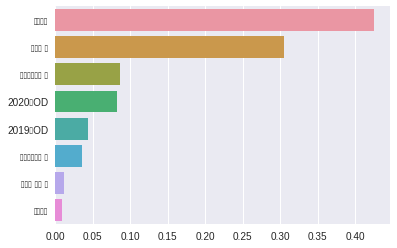

In [ ]:
# GB regressor 

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
gb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=gb_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
#Permutation importance of GB
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gb_reg,random_state=0).fit(X_data,y_target)
eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
1.0310 ± 0.5502,유동인구
0.4104 ± 0.2640,기업체 수
0.1437 ± 0.0637,체육편의시설 수
0.1029 ± 0.0173,2020총OD
0.0719 ± 0.0054,2019총OD
0.0205 ± 0.0106,문화쇼핑시설 수
0.0045 ± 0.0030,대규모 점포 수
0.0028 ± 0.0020,상권유무


In [ ]:
# # XGB regressor 

# # 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
# xgb_reg.fit(X_data, y_target)

# feature_series = pd.Series(data=xgb_reg.feature_importances_, index=X_data.columns )
# feature_series = feature_series.sort_values(ascending=False)
# sns.barplot(x= feature_series, y=feature_series.index)

In [ ]:
# #Permutation importance of XGB
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(xgb_reg,random_state=0).fit(X_data,y_target)
# eli5.show_weights(perm, feature_names = X_data.columns.tolist())

In [ ]:
import statsmodels.api as sm
# 상수항 b0 추가 
X_data1 = sm.add_constant(X_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y_target, X_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()
y_target = df_scaled['변화량']
X_data = df_scaled.drop(['2019총OD','상권유무','대규모 점포 수','문화쇼핑시설 수','2019총OD','체육편의시설 수'], axis=1, inplace=False)
# 상수항 b0 추가 
X_data1 = sm.add_constant(X_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y_target, X_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    변화량   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.864e+30
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:17:10   Log-Likelihood:                 1196.9
No. Observations:                  35   AIC:                            -2384.
Df Residuals:                      30   BIC:                            -2376.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.018e-16   1.56e-16     -1.930      0.063   -6.21e-16    1.75e-17
2020총OD     1.388e-16   2.98e-16      0.465      0.645   -4.71e-16    7.48e-16
변화량            1.0000   2.75e-16   3.64e+15      0.000       1.000       1.000
유동인구       -1.145e-16   3.19e-16     -0.359      0.722   -7.65e-16    5.36e-16
기업체 수       7.286e-17   3.03e-16      0.240      0.812   -5.46e-16    6.92e-16
==============================================================================
Omnibus:                        3.857   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.592
Skew:                           0.627   Prob(JB):                        0.274
Kurtosis:                       3.455   Cond. No.                         8.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# feature importance 기반으로 점수식 만들기

# 유동인구 / 기업체 수 두가지 고려

# 1.0310 / 1.0310	유동인구
# 0.4104 / 1.0310	기업체
# 0.1437 / 1.0310	체육편의시설
# 0.1029 / 1.0310	 2020 총 0d 

유동인구w = 1.0310 / 1.0310
기업체w = 0.4104 / 1.0310
체육편의시설w = 0.1437 / 1.0310
odw = 0.1029 / 1.0310

In [ ]:
# 데이터프레임에서 두가지 변수만 추출
df_수요지수 = df_scaled[['유동인구','기업체 수']]

잠재수요지수 = []
for i in range(len(df_수요지수)):
  잠재수요지수.append( ( df_수요지수.values[i][0] * 유동인구w ) + ( df_수요지수.values[i][1] * 기업체w ) )
df_수요지수['잠재수요지수'] = 잠재수요지수
df_수요지수['행정동'] = dfd['행정동']
df_수요지수

,유동인구,기업체 수,잠재수요지수,행정동
0,0.427429,0.930514,0.797829,구갈동
1,0.530288,0.359085,0.673226,구성동
2,0.679307,0.359085,0.822244,기흥동
3,0.623940,0.413897,0.788696,남사읍
4,0.354010,0.132067,0.406581,동백1동
5,0.456021,0.731981,0.747394,동백2동
6,0.180882,0.000000,0.180882,동백3동
7,0.157136,0.304704,0.278427,동부동
8,0.582505,0.676306,0.851716,동천동
9,0.554519,0.227881,0.645229,마북동


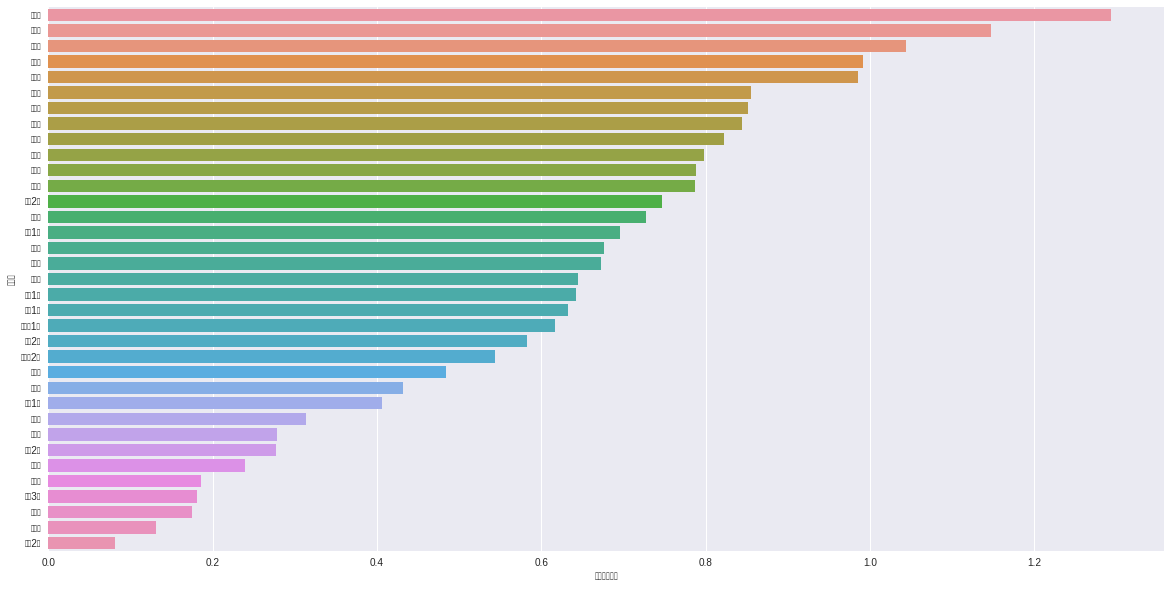

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
순위대로정렬 = df_수요지수.sort_values('잠재수요지수', ascending=False)

sns.barplot(x=순위대로정렬['잠재수요지수'], y=순위대로정렬['행정동'])

In [ ]:
# min-max scale
curr_count=dfb_23[['현재수요지수']]
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(curr_count)
columns = curr_count.columns
curr_count = pd.DataFrame(scaled,columns=columns)
#현재수요지수 합치기
curr_count['행정동']=dfb_23['행정동']
df_cf=pd.merge(df_수요지수,curr_count,on='행정동')
df_cf

,유동인구,기업체 수,잠재수요지수,행정동,현재수요지수
0,0.427429,0.930514,0.797829,구갈동,0.556319
1,0.530288,0.359085,0.673226,구성동,0.429095
2,0.679307,0.359085,0.822244,기흥동,0.439509
3,0.623940,0.413897,0.788696,남사읍,0.354266
4,0.354010,0.132067,0.406581,동백1동,0.245899
5,0.456021,0.731981,0.747394,동백2동,0.309476
6,0.180882,0.000000,0.180882,동백3동,0.188933
7,0.157136,0.304704,0.278427,동부동,0.000000
8,0.582505,0.676306,0.851716,동천동,0.557591
9,0.554519,0.227881,0.645229,마북동,0.529850


In [ ]:
#순위매기기
df_cf['현재수요순위'] = df_cf.현재수요지수.rank(method='max',ascending=False)
df_cf['잠재수요순위'] = df_cf.잠재수요지수.rank(method='max',ascending=False)
df_cf['최종순위']=df_cf['잠재수요순위']+df_cf['현재수요순위']
df_cf['현재수요순위']=df_cf['현재수요순위'].astype(int)
df_cf['잠재수요순위']=df_cf['잠재수요순위'].astype(int)
df_cf['최종순위']=df_cf['최종순위'].astype(int)
df_cf=df_cf.sort_values(by='최종순위',ascending=True)

In [ ]:
df_cf

,유동인구,기업체 수,잠재수요지수,행정동,현재수요지수,현재수요순위,잠재수요순위,최종순위
32,1.000000,0.737592,1.293606,포곡읍,0.655246,6,1,7
23,0.569906,0.689685,0.844442,역삼동,0.692828,5,8,13
8,0.582505,0.676306,0.851716,동천동,0.557591,7,7,14
20,0.787739,0.513164,0.992009,신갈동,0.521619,11,4,15
13,0.855706,0.733276,1.147594,보정동,0.491639,13,2,15
19,0.640659,0.367285,0.786861,성복동,0.721281,4,12,16
27,0.730191,0.312905,0.854746,유림동,0.529723,10,6,16
10,0.348074,0.953388,0.727579,모현읍,0.967073,2,14,16
0,0.427429,0.930514,0.797829,구갈동,0.556319,8,10,18
22,0.827235,0.544670,1.044047,양지면,0.422114,20,3,23


In [ ]:
# df_cf.to_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/활동지_읍면동별수요지수.csv')

In [ ]:
# 활동지 읍면동별 수요지수 가져와서 수요지수 만들어주기 
활동지읍면동 = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/결과물/활동지_읍면동별수요지수.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(활동지읍면동[['잠재수요지수']])
활동지읍면동['잠재수요지수scaled'] = scaled
활동지읍면동['최종수요지수합']=활동지읍면동['현재수요지수'] + 활동지읍면동['잠재수요지수scaled']
scaled= minMaxScaler.fit_transform(활동지읍면동[['최종수요지수합']])
활동지읍면동['최종수요지수합scaled'] = scaled
활동지읍면동

,Unnamed: 0,유동인구,기업체 수,잠재수요지수,행정동,현재수요지수,현재수요순위,잠재수요순위,최종순위,잠재수요지수scaled,최종수요지수합,최종수요지수합scaled
0,32,1.000000,0.737592,1.293606,포곡읍,0.655246,6,1,7,1.000000,1.655246,1.000000
1,23,0.569906,0.689685,0.844442,역삼동,0.692828,5,8,13,0.629403,1.322231,0.780984
2,8,0.582505,0.676306,0.851716,동천동,0.557591,7,7,14,0.635404,1.192996,0.695989
3,20,0.787739,0.513164,0.992009,신갈동,0.521619,11,4,15,0.751158,1.272777,0.748460
4,13,0.855706,0.733276,1.147594,보정동,0.491639,13,2,15,0.879528,1.371167,0.813168
5,19,0.640659,0.367285,0.786861,성복동,0.721281,4,12,16,0.581894,1.303175,0.768451
6,27,0.730191,0.312905,0.854746,유림동,0.529723,10,6,16,0.637905,1.167628,0.679306
7,10,0.348074,0.953388,0.727579,모현읍,0.967073,2,14,16,0.532982,1.500055,0.897935
8,0,0.427429,0.930514,0.797829,구갈동,0.556319,8,10,18,0.590944,1.147263,0.665912
9,22,0.827235,0.544670,1.044047,양지면,0.422114,20,3,23,0.794093,1.216207,0.711255


In [ ]:
# 활동지읍면동.to_csv('/content/gdrive/Shareddrives/전기차/data/결과물/읍면동_활동지수요점수끝.csv')

### 거주지 잠재수요점수 산출 (아파트 clustering) 

#### K-means Clustering (아파트별 군집 나누기) 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
ss = MinMaxScaler()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df3=pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/최종거주지입지선정클러스터링진짜최종.csv')

In [ ]:
df3.head()

,index,Unnamed: 0,Column1,df_apt_idx,LA,LO,법정동,주번_부,아파트,count_cust,age_avg,완속최소설치개수,완속설치개수,부족개수,매매(억),세대수,총주차대수,행정동
0,0,0,6,6,37.267156,127.217583,경기도 용인시 처인구 포곡읍 둔전리,1470000,신원2차아파트,599.384,9.649709,4.0,0,4.0,3.00,296.0,296,포곡읍
1,1,12,20,20,37.270094,127.212311,경기도 용인시 처인구 포곡읍 둔전리,3190000,인정멜로디아파트,2412.584,8.585178,15.0,0,15.0,2.30,831.0,824,포곡읍
2,2,14,26,28,37.266887,127.216223,경기도 용인시 처인구 포곡읍 둔전리,4470000,금전마을계룡리슈빌,527.950,6.175950,8.0,2,6.0,4.30,441.0,485,포곡읍
3,3,15,27,29,37.273634,127.221171,경기도 용인시 처인구 포곡읍 둔전리,4490000,용인포곡삼성쉐르빌아파트,620.068,8.348547,12.0,6,6.0,4.80,469.0,671,포곡읍
4,4,17,29,31,37.272202,127.210297,경기도 용인시 처인구 포곡읍 영문리,5550000,배머루마을 인정베네치아빌리지,170.366,8.569379,7.0,0,7.0,3.47,347.0,422,포곡읍


In [ ]:
apart = df3[['법정동','행정동','주번_부','아파트','매매(억)','총주차대수','세대수','age_avg']]

In [ ]:
apart.isnull().sum()

법정동        0
행정동        0
주번_부       0
아파트        0
매매(억)      0
총주차대수      0
세대수        0
age_avg    0
dtype: int64

In [ ]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   법정동      395 non-null    object 
 1   행정동      395 non-null    object 
 2   주번_부     395 non-null    int64  
 3   아파트      395 non-null    object 
 4   매매(억)    395 non-null    float64
 5   총주차대수    395 non-null    int64  
 6   세대수      395 non-null    float64
 7   age_avg  395 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 24.8+ KB


In [ ]:
for_kmeans=apart[['매매(억)',	'세대수','age_avg']]

In [ ]:
for_kmeans

,매매(억),세대수,age_avg
0,3.00,296.0,9.649709
1,2.30,831.0,8.585178
2,4.30,441.0,6.175950
3,4.80,469.0,8.348547
4,3.47,347.0,8.569379
...,...,...,...
390,7.30,425.0,7.499142
391,12.00,344.0,8.498300
392,9.10,980.0,8.405539
393,8.20,283.0,8.051652


In [ ]:
scaled_data = ss.fit_transform(for_kmeans)
scaled_df=pd.DataFrame(scaled_data, columns = ['매매(억)',	'세대수','age_avg'], index=apart.index)

In [ ]:
scaled_df

,매매(억),세대수,age_avg
0,0.112426,0.066183,0.592283
1,0.071006,0.308704,0.484554
2,0.189349,0.131913,0.240743
3,0.218935,0.144606,0.460607
4,0.140237,0.089302,0.482955
...,...,...,...
390,0.366864,0.124660,0.374648
391,0.644970,0.087942,0.475762
392,0.473373,0.376247,0.466374
393,0.420118,0.060290,0.430562


Text(0, 0.5, 'Within Cluster Sum of Squares')

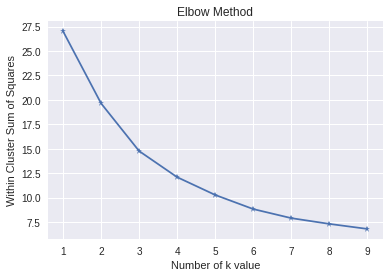

In [ ]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot([1,2,3,4,5,6,7,8,9], wcss, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of k value')
plt.ylabel('Within Cluster Sum of Squares')

Text(0, 0.5, 'silhouette_score')

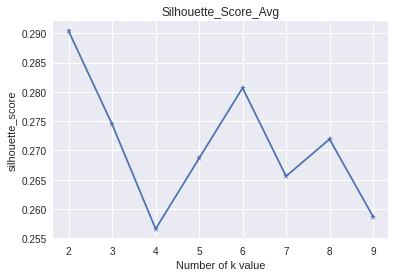

In [ ]:
silhouette_score_avg = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  clusters = kmeans.fit(scaled_data)
  average_score = silhouette_score(scaled_data, clusters.labels_)
  silhouette_score_avg.append(average_score)

plt.plot([2,3,4,5,6,7,8,9],silhouette_score_avg, marker='*')
plt.title('Silhouette_Score_Avg')
plt.xlabel('Number of k value')
plt.ylabel('silhouette_score')

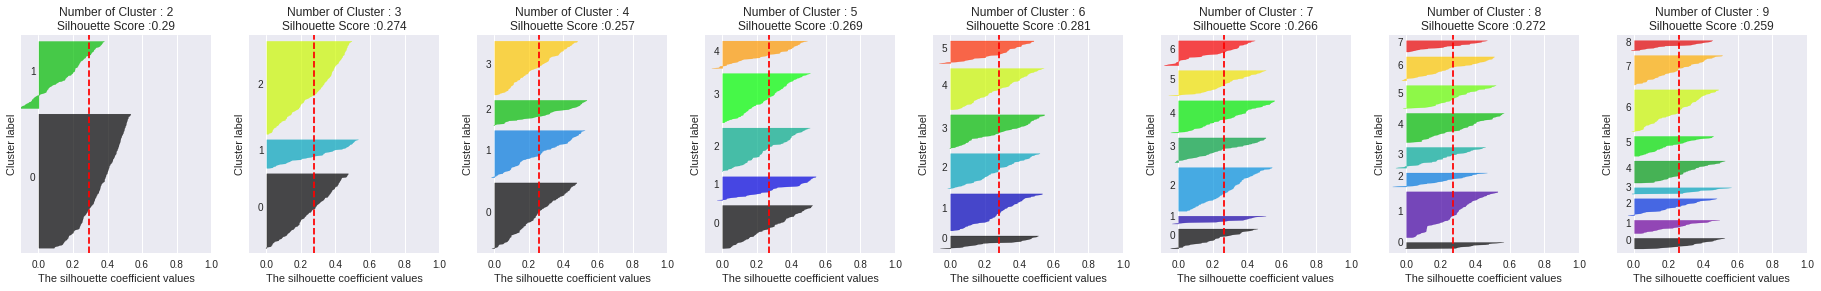

In [ ]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
from sklearn.datasets import load_iris

# iris = load_iris()
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9], scaled_data)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit(scaled_data)
scaled_df['cluster'] = clusters.labels_ # KMeans를 통해 도출된 cluster 값을 추가
# scaled_df[['행정동','주번_부','아파트']] = apart[['행정동','주번_부','아파트']]

# scaled_df.index = apart['아파트']
scaled_df

,매매(억),세대수,age_avg,cluster
0,0.112426,0.066183,0.592283,3
1,0.071006,0.308704,0.484554,3
2,0.189349,0.131913,0.240743,2
3,0.218935,0.144606,0.460607,3
4,0.140237,0.089302,0.482955,3
...,...,...,...,...
390,0.366864,0.124660,0.374648,2
391,0.644970,0.087942,0.475762,5
392,0.473373,0.376247,0.466374,1
393,0.420118,0.060290,0.430562,4


In [ ]:
#cluster 속성의 요약 값
new_scaled=scaled_df.groupby('cluster').mean()
new_scaled['age_avg']=[1-i for i in new_scaled['age_avg']]
new_scaled['총합'] = new_scaled['매매(억)']+new_scaled['세대수']+new_scaled['age_avg']
new_scaled['총합'] = ss.fit_transform(new_scaled[['총합']])
new_scaled

,매매(억),세대수,age_avg,총합
cluster,,,,
0,0.408326,0.612064,0.522160,1.000000
1,0.327604,0.281902,0.538130,0.504382
2,0.302235,0.101213,0.692128,0.439048
3,0.157413,0.107925,0.480398,0.000000
4,0.410488,0.087659,0.430688,0.229790
5,0.639778,0.196056,0.551936,0.805751


In [ ]:
scaled_df[['법정동','행정동','주번_부','아파트']] = apart[['법정동','행정동','주번_부','아파트']]

In [ ]:
scaled_df['법정동주소상세'] = scaled_df['법정동'] + ' ' +scaled_df['주번_부'].astype(str)

In [ ]:
scaled_df['군집별총합'] = pd.Series()
scaled_df['군집별총합'][scaled_df['cluster']==0] = 1.542550
scaled_df['군집별총합'][scaled_df['cluster']==1] = 1.147635
scaled_df['군집별총합'][scaled_df['cluster']==2] = 	1.095576
scaled_df['군집별총합'][scaled_df['cluster']==3] = 0.745736
scaled_df['군집별총합'][scaled_df['cluster']==4] = 	0.928836
scaled_df['군집별총합'][scaled_df['cluster']==5] = 1.387770

In [ ]:
scaled_df.sample(5)

,매매(억),세대수,age_avg,cluster,법정동,행정동,주번_부,아파트,법정동주소상세,군집별총합
155,0.213018,0.386673,0.618892,1,경기도 용인시 기흥구 하갈동,영덕2동,6310000,청명호수마을 신안인스빌1단지,경기도 용인시 기흥구 하갈동 6310000,1.147635
311,0.491124,0.067090,0.412455,4,경기도 용인시 수지구 신봉동,신봉동,9590000,신봉마을 용인신봉 센트레빌 1단지,경기도 용인시 수지구 신봉동 9590000,0.928836
81,0.349112,0.139619,0.384167,2,경기도 용인시 기흥구 서천동,서농동,8340000,용인서천 효성해링턴플레이스,경기도 용인시 기흥구 서천동 8340000,1.095576
286,0.331361,0.693110,0.462667,0,경기도 용인시 기흥구 하갈동,영덕2동,6350000,용인기흥효성해링턴플레이스,경기도 용인시 기흥구 하갈동 6350000,1.542550
191,0.624260,0.427924,0.561796,5,경기도 용인시 수지구 성복동,성복동,8190000,성복역 롯데캐슬 클라시엘,경기도 용인시 수지구 성복동 8190000,1.387770


In [ ]:
scaled_df[['아파트','cluster','군집별총합']].to_csv("/content/drive/Shareddrives/전기차/data/결과물/아파트별군별및총합.csv",index=False)

In [ ]:
pd.read_csv("/content/drive/Shareddrives/전기차/data/결과물/아파트별군별및총합.csv")

,아파트,cluster,군집별총합
0,신원2차아파트,3,0.745736
1,인정멜로디아파트,3,0.745736
2,금전마을계룡리슈빌,2,1.095576
3,용인포곡삼성쉐르빌아파트,3,0.745736
4,배머루마을 인정베네치아빌리지,3,0.745736
...,...,...,...
390,블루밍벽산3단지아파트,2,1.095576
391,수진마을2단지,5,1.387770
392,더샵 동천이스트포레,1,1.147635
393,광교쌍용포레듀엔B,4,0.928836


In [ ]:
#아파트 단지 이름으로 클러스터 구분
cluster_0 = scaled_df['아파트'][scaled_df['cluster']==0].to_list()
cluster_1 = scaled_df['아파트'][scaled_df['cluster']==1].to_list()
cluster_2 = scaled_df['아파트'][scaled_df['cluster']==2].to_list()
cluster_3 = scaled_df['아파트'][scaled_df['cluster']==3].to_list()
cluster_4 = scaled_df['아파트'][scaled_df['cluster']==4].to_list()
cluster_5 = scaled_df['아파트'][scaled_df['cluster']==5].to_list()

print('cluster_0:\n',cluster_0,'\n')
print('cluster_1:\n',cluster_1,'\n')
print('cluster_2:\n',cluster_2,'\n')
print('cluster_3:\n',cluster_3,'\n')
print('cluster_4:\n',cluster_4,'\n')
print('cluster_5:\n',cluster_5,'\n')

cluster_0:
 ['쌍용스윗닷홀아파트', '탑실마을 대주피오레2단지아파트', '블루밍구성더센트럴', '신동백 롯데캐슬에코1단지아파트', '행원마을동아솔레시티아파트', '죽현마을 아이파크', '상하동 621', '강남마을주공8단지아파트', '신흥덕롯데캐슬레이시티', '현대아파트', '동아.삼익.풍림아파트', '성복역 롯데캐슬 골드타운', '우미린센트럴파크', '역북지웰푸르지오', '새터마을죽전힐스테이트', '내대지마을건영캐스빌', '신동백 두산위브더제니스', '용인기흥효성해링턴플레이스', '삼성래미안2차아파트', '신정마을8단지현대성우아파트', 'e편한세상 수지', '신봉마을엘지자이1차아파트', '신봉마을자이2차아파트', '동천마을현대2차홈타운', '동문굿모닝힐5차아파트', '성동마을 엘지빌리지3차', '진산마을삼성래미안5차아파트', '진산마을성원상떼빌아파트'] 

cluster_1:
 ['용인 행정타운 두산위브 2단지', '양우내안애에듀퍼스트', '한성아파트', '기흥구갈한양수자인아파트', '강남마을자연&아이원4단지아파트', '계룡리슈빌7단지아파트', '기흥역지웰푸르지오', '민속마을신창미션힐아파트', '보라마을 현대모닝사이드2차아파트', '민속마을 현대모닝사이드아파트', '한보라 THE HILL 아파트', '보라해링턴플레이스', '써니밸리아파트', '한보라마을휴먼시아7단지아파트', '탑실마을 대주피오레1단지아파트', '서그내마을에스케이아파트', '힐스테이트 서천', '영통로 효성해링턴플레이스', '서천 센트럴파크원', '하마비마을 동일하이빌1차아파트', '하마비마을 동일하이빌2차아파트', '초원마을 성원상떼빌2차아파트', '휴먼시아 물푸레마을 3단지 아파트', '교동마을 현대홈타운아파트', '신동백 서해그랑블2단지아파트', '연원마을성원상떼빌아파트', '강남마을한라비발디아파트', '갈천마을신일유토빌아파트', '지석마을 그대가 크레던스', '도현마을현대아이파크아파트', '기흥역롯데캐슬스카이', '양현마을풍림신안아파트', '기흥파크뷰', '청명호수마을 신안

In [ ]:
#아파트 단지 상세한 법정동주소로 클러스터 구분
cluster_0 = scaled_df['법정동주소상세'][scaled_df['cluster']==0].to_list()
cluster_1 = scaled_df['법정동주소상세'][scaled_df['cluster']==1].to_list()
cluster_2 = scaled_df['법정동주소상세'][scaled_df['cluster']==2].to_list()
cluster_3 = scaled_df['법정동주소상세'][scaled_df['cluster']==3].to_list()
cluster_4 = scaled_df['법정동주소상세'][scaled_df['cluster']==4].to_list()
cluster_5 = scaled_df['법정동주소상세'][scaled_df['cluster']==5].to_list()

print('cluster_0:\n',cluster_0,'\n')
print('cluster_1:\n',cluster_1,'\n')
print('cluster_2:\n',cluster_2,'\n')
print('cluster_3:\n',cluster_3,'\n')
print('cluster_4:\n',cluster_4,'\n')
print('cluster_5:\n',cluster_5,'\n')

cluster_0:
 ['경기도 용인시 기흥구 보라동 5530000', '경기도 용인시 기흥구 공세동 7140000', '경기도 용인시 기흥구 마북동 5240008', '경기도 용인시 기흥구 중동 10960000', '경기도 용인시 기흥구 보정동 11620000', '경기도 용인시 기흥구 보정동 12670000', '경기도 용인시 기흥구 상하동 6210000', '경기도 용인시 기흥구 상하동 6360000', '경기도 용인시 기흥구 신갈동 7360000', '경기도 용인시 수지구 풍덕천동 7000001', '경기도 용인시 수지구 풍덕천동 6640000', '경기도 용인시 수지구 성복동 7890000', '경기도 용인시 처인구 역북동 7360000', '경기도 용인시 처인구 역북동 8090000', '경기도 용인시 수지구 죽전동 11650000', '경기도 용인시 수지구 죽전동 11820000', '경기도 용인시 기흥구 동백동 4190010', '경기도 용인시 기흥구 하갈동 6350000', '경기도 용인시 기흥구 마북동 6280000', '경기도 용인시 수지구 풍덕천동 11120000', '경기도 용인시 수지구 풍덕천동 12090000', '경기도 용인시 수지구 신봉동 8730000', '경기도 용인시 수지구 신봉동 9110000', '경기도 용인시 수지구 동천동 8620000', '경기도 용인시 수지구 동천동 9140000', '경기도 용인시 수지구 성복동 7260000', '경기도 용인시 수지구 풍덕천동 11680001', '경기도 용인시 수지구 풍덕천동 2200005'] 

cluster_1:
 ['경기도 용인시 처인구 삼가동 5630000', '경기도 용인시 처인구 고림동 10140000', '경기도 용인시 기흥구 구갈동 3800000', '경기도 용인시 기흥구 구갈동 3960000', '경기도 용인시 기흥구 구갈동 6000000', '경기도 용인시 기흥구 구갈동 6040000', '경기도 용인시 기흥구 구갈동 2270034', '경기도 용인시 기흥구 

In [ ]:
#아파트 단지 행정동주소로 클러스터 구분
cluster_0 = scaled_df['행정동'][scaled_df['cluster']==0].to_list()
cluster_1 = scaled_df['행정동'][scaled_df['cluster']==1].to_list()
cluster_2 = scaled_df['행정동'][scaled_df['cluster']==2].to_list()
cluster_3 = scaled_df['행정동'][scaled_df['cluster']==3].to_list()
cluster_4 = scaled_df['행정동'][scaled_df['cluster']==4].to_list()
cluster_5 = scaled_df['행정동'][scaled_df['cluster']==5].to_list()

print('cluster_0:\n',cluster_0,'\n')
print('cluster_1:\n',cluster_1,'\n')
print('cluster_2:\n',cluster_2,'\n')
print('cluster_3:\n',cluster_3,'\n')
print('cluster_4:\n',cluster_4,'\n')
print('cluster_5:\n',cluster_5,'\n')

cluster_0:
 ['보라동', '기흥동', '마북동', '동백3동', '보정동', '보정동', '상하동', '상하동', '신갈동', '풍덕천1동', '풍덕천1동', '성복동', '역삼동', '역삼동', '죽전1동', '죽전1동', '동백3동', '영덕2동', '마북동', '풍덕천2동', '풍덕천2동', '신봉동', '신봉동', '동천동', '동천동', '성복동', '풍덕천2동', '상현2동'] 

cluster_1:
 ['역삼동', '유림동', '구갈동', '구갈동', '구갈동', '구갈동', '구갈동', '보라동', '보라동', '보라동', '보라동', '보라동', '보라동', '기흥동', '기흥동', '서농동', '서농동', '서농동', '서농동', '구성동', '구성동', '구성동', '구성동', '마북동', '동백3동', '보정동', '상하동', '상하동', '상하동', '신갈동', '신갈동', '신갈동', '신갈동', '영덕2동', '풍덕천1동', '풍덕천1동', '풍덕천1동', '풍덕천1동', '풍덕천2동', '풍덕천2동', '성복동', '영덕1동', '영덕1동', '영덕1동', '상갈동', '동백2동', '동백2동', '동백2동', '동백1동', '역삼동', '죽전1동', '상현1동', '상현1동', '상현1동', '상현1동', '동백2동', '동백1동', '동백2동', '유림동', '신갈동', '모현읍', '영덕2동', '풍덕천2동', '신봉동', '죽전1동', '죽전1동', '죽전1동', '죽전1동', '죽전2동', '죽전2동', '죽전2동', '동천동', '상현1동', '상현2동', '상현2동', '상현2동', '상현2동', '성복동', '죽전2동', '동천동'] 

cluster_2:
 ['포곡읍', '중앙동', '중앙동', '중앙동', '유림동', '유림동', '동부동', '동부동', '구갈동', '구갈동', '보라동', '보라동', '기흥동', '기흥동', '서농동', '서농동', '구성동', '구성동', '구성동', '마북동', 

#### K-means clustering visualization

Text(0.5, 1.0, 'Clustering Visualization')

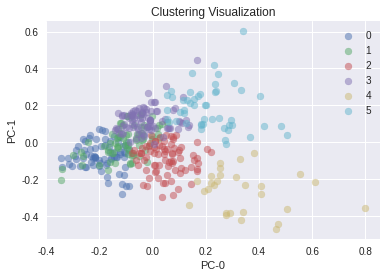

In [ ]:
from sklearn.decomposition import PCA
X = scaled_data
pca = PCA(n_components=2) #4개 변수를 2개 변수로 차원 축소
pca.fit(X) #주성분 찾기
x_pca = pca.transform(X) #찾은 주성분으로 데이터를 변환(차원축소)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = scaled_df['cluster'].to_list()

for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0], tmp[1], alpha=0.5)

plt.legend([0,1,2,3,4,5])
plt.xlabel('PC-0')
plt.ylabel('PC-1')
plt.title('Clustering Visualization')

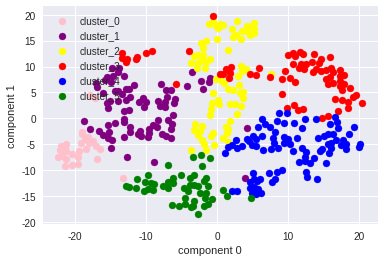

In [ ]:
from sklearn.manifold import TSNE

# class target 정보 제외
train_df = scaled_df[['매매(억)',	'세대수',	'age_avg']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

tsne_df['cluster'] = scaled_df['cluster']

tsne_df_0 = tsne_df[tsne_df['cluster'] == 0]
tsne_df_1 = tsne_df[tsne_df['cluster'] == 1]
tsne_df_2 = tsne_df[tsne_df['cluster'] == 2]
tsne_df_3 = tsne_df[tsne_df['cluster'] == 3]
tsne_df_4 = tsne_df[tsne_df['cluster'] == 4]
tsne_df_5 = tsne_df[tsne_df['cluster'] == 5]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'cluster_0')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'cluster_1')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'cluster_2')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'cluster_3')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'cluster_4')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'cluster_5')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

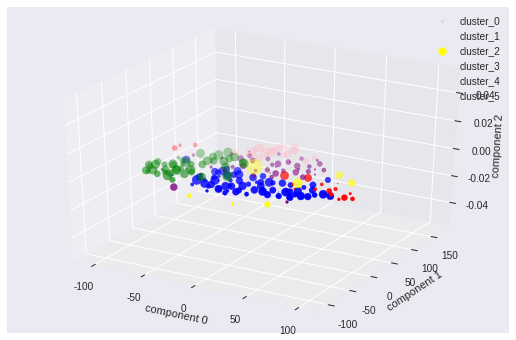

In [ ]:
from sklearn.manifold import TSNE

# 3차원 t-SNE 임베딩
train_df = scaled_df[['매매(억)',	'세대수',	'age_avg']]

tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['cluster'] = scaled_df['cluster']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['cluster'] == 0]
tsne_df_1 = tsne_df[tsne_df['cluster'] == 1]
tsne_df_2 = tsne_df[tsne_df['cluster'] == 2]
tsne_df_3 = tsne_df[tsne_df['cluster'] == 3]
tsne_df_4 = tsne_df[tsne_df['cluster'] == 4]
tsne_df_5 = tsne_df[tsne_df['cluster'] == 5]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'cluster_0')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'cluster_1')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'cluster_2')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], tsne_df_3['component 2'], color = 'red', label = 'cluster_3')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], tsne_df_4['component 2'], color = 'blue', label = 'cluster_4')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], tsne_df_5['component 2'], color = 'green', label = 'cluster_5')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

### 거주지 최종수요 산출 데이터가공 


In [ ]:
# 아파트별 클러스터 합쳐주기 
클러스터 = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/아파트별군별및총합.csv')
클러스터

,아파트,cluster,군집별총합
0,신원2차아파트,3,0.745736
1,인정멜로디아파트,3,0.745736
2,금전마을계룡리슈빌,2,1.095576
3,용인포곡삼성쉐르빌아파트,3,0.745736
4,배머루마을 인정베네치아빌리지,3,0.745736
...,...,...,...
390,블루밍벽산3단지아파트,2,1.095576
391,수진마을2단지,5,1.387770
392,더샵 동천이스트포레,1,1.147635
393,광교쌍용포레듀엔B,4,0.928836


In [ ]:
# 거주지 아파트별 카운트 순위 
거주지아파트 = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/최종거주지입지선정클러스터링진짜최종.csv')
거주지아파트['cluster'] = 클러스터['cluster']
거주지아파트['군집별총합'] = 클러스터['군집별총합']
거주지아파트 = 거주지아파트.sort_values('count_cust',ascending=False)
거주지아파트['아파트count순위'] = list(range(1,396))
거주지아파트

# 아파트 카운트 스케일링
scaled= minMaxScaler.fit_transform(거주지아파트[['count_cust']])
거주지아파트['count_cust_scaled'] = scaled
거주지아파트 = 거주지아파트.reset_index()
거주지아파트

,level_0,index,Unnamed: 0,Column1,df_apt_idx,LA,LO,법정동,주번_부,아파트,...,완속설치개수,부족개수,매매(억),세대수,총주차대수,행정동,cluster,군집별총합,아파트count순위,count_cust_scaled
0,302,316,549,769,919,37.326311,127.078080,경기도 용인시 수지구 신봉동,8730000,신봉마을엘지자이1차아파트,...,30,31.0,7.40,1990.0,3106,신봉동,0,1.542550,1,1.000000
1,189,196,330,1010,1175,37.312441,127.082979,경기도 용인시 수지구 성복동,7890000,성복역 롯데캐슬 골드타운,...,50,5.0,12.50,2356.0,2817,성복동,0,1.542550,2,0.980181
2,343,358,620,891,1049,37.338712,127.095963,경기도 용인시 수지구 동천동,8620000,동천마을현대2차홈타운,...,4,17.0,8.72,1128.0,1126,동천동,0,1.542550,3,0.915395
3,378,394,704,993,1157,37.318210,127.073024,경기도 용인시 수지구 성복동,7260000,성동마을 엘지빌리지3차,...,0,59.0,9.70,1234.0,3018,성복동,0,1.542550,4,0.858751
4,238,250,400,1196,1402,37.334392,127.122175,경기도 용인시 수지구 죽전동,11650000,새터마을죽전힐스테이트,...,2,37.0,7.30,1998.0,2032,죽전1동,0,1.542550,5,0.836092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,36,37,93,256,336,37.231956,127.214213,경기도 용인시 처인구 마평동,6050001,라이프아파트 101동,...,4,0.0,3.00,290.0,217,동부동,2,1.095576,391,0.001935
391,130,137,226,523,644,37.321606,127.101426,경기도 용인시 기흥구 보정동,14010000,죽전역샬레파인비스타,...,3,0.0,7.90,155.0,187,보정동,2,1.095576,392,0.001011
392,291,305,532,181,239,37.227494,127.209762,경기도 용인시 처인구 남동,6850000,구미마을 삼라 마이다스빌,...,0,2.0,3.20,159.0,161,중앙동,2,1.095576,393,0.000999
393,331,346,591,836,992,37.327550,127.113547,경기도 용인시 수지구 죽전동,10880002,죽전역 솔하임,...,0,2.0,3.50,234.0,170,죽전1동,2,1.095576,394,0.000009


In [ ]:
# 거주지 옆에 읍면동 수요지수 달아주기
최종수요지수scaled=[]
for i in range(len(거주지아파트)):
  for j in range(len(거주지읍면동)):
    if 거주지아파트['행정동'][i] == 거주지읍면동['행정동'][j]:
      최종수요지수scaled.append(거주지읍면동['최종수요지수합scaled'][j])

거주지아파트['읍면동scaled'] = 최종수요지수scaled
거주지아파트

,level_0,index,Unnamed: 0,Column1,df_apt_idx,LA,LO,법정동,주번_부,아파트,...,부족개수,매매(억),세대수,총주차대수,행정동,cluster,군집별총합,아파트count순위,count_cust_scaled,읍면동scaled
0,302,316,549,769,919,37.326311,127.078080,경기도 용인시 수지구 신봉동,8730000,신봉마을엘지자이1차아파트,...,31.0,7.40,1990.0,3106,신봉동,0,1.542550,1,1.000000,0.616302
1,189,196,330,1010,1175,37.312441,127.082979,경기도 용인시 수지구 성복동,7890000,성복역 롯데캐슬 골드타운,...,5.0,12.50,2356.0,2817,성복동,0,1.542550,2,0.980181,1.000000
2,343,358,620,891,1049,37.338712,127.095963,경기도 용인시 수지구 동천동,8620000,동천마을현대2차홈타운,...,17.0,8.72,1128.0,1126,동천동,0,1.542550,3,0.915395,0.883181
3,378,394,704,993,1157,37.318210,127.073024,경기도 용인시 수지구 성복동,7260000,성동마을 엘지빌리지3차,...,59.0,9.70,1234.0,3018,성복동,0,1.542550,4,0.858751,1.000000
4,238,250,400,1196,1402,37.334392,127.122175,경기도 용인시 수지구 죽전동,11650000,새터마을죽전힐스테이트,...,37.0,7.30,1998.0,2032,죽전1동,0,1.542550,5,0.836092,0.894092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,36,37,93,256,336,37.231956,127.214213,경기도 용인시 처인구 마평동,6050001,라이프아파트 101동,...,0.0,3.00,290.0,217,동부동,2,1.095576,391,0.001935,0.160869
391,130,137,226,523,644,37.321606,127.101426,경기도 용인시 기흥구 보정동,14010000,죽전역샬레파인비스타,...,0.0,7.90,155.0,187,보정동,2,1.095576,392,0.001011,0.570164
392,291,305,532,181,239,37.227494,127.209762,경기도 용인시 처인구 남동,6850000,구미마을 삼라 마이다스빌,...,2.0,3.20,159.0,161,중앙동,2,1.095576,393,0.000999,0.246571
393,331,346,591,836,992,37.327550,127.113547,경기도 용인시 수지구 죽전동,10880002,죽전역 솔하임,...,2.0,3.50,234.0,170,죽전1동,2,1.095576,394,0.000009,0.894092


In [ ]:
# 거주지 옆에 읍면동 순위 달아주기
읍면동순위=[]
for i in range(len(거주지아파트)):
  for j in range(len(거주지읍면동)):
    if 거주지아파트['행정동'][i] == 거주지읍면동['행정동'][j]:
      읍면동순위.append(거주지읍면동['최종순위'][j])

거주지아파트['읍면동순위'] = 읍면동순위 
거주지아파트

,level_0,index,Unnamed: 0,Column1,df_apt_idx,LA,LO,법정동,주번_부,아파트,...,매매(억),세대수,총주차대수,행정동,cluster,군집별총합,아파트count순위,count_cust_scaled,읍면동scaled,읍면동순위
0,302,316,549,769,919,37.326311,127.078080,경기도 용인시 수지구 신봉동,8730000,신봉마을엘지자이1차아파트,...,7.40,1990.0,3106,신봉동,0,1.542550,1,1.000000,0.616302,9
1,189,196,330,1010,1175,37.312441,127.082979,경기도 용인시 수지구 성복동,7890000,성복역 롯데캐슬 골드타운,...,12.50,2356.0,2817,성복동,0,1.542550,2,0.980181,1.000000,1
2,343,358,620,891,1049,37.338712,127.095963,경기도 용인시 수지구 동천동,8620000,동천마을현대2차홈타운,...,8.72,1128.0,1126,동천동,0,1.542550,3,0.915395,0.883181,2
3,378,394,704,993,1157,37.318210,127.073024,경기도 용인시 수지구 성복동,7260000,성동마을 엘지빌리지3차,...,9.70,1234.0,3018,성복동,0,1.542550,4,0.858751,1.000000,1
4,238,250,400,1196,1402,37.334392,127.122175,경기도 용인시 수지구 죽전동,11650000,새터마을죽전힐스테이트,...,7.30,1998.0,2032,죽전1동,0,1.542550,5,0.836092,0.894092,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,36,37,93,256,336,37.231956,127.214213,경기도 용인시 처인구 마평동,6050001,라이프아파트 101동,...,3.00,290.0,217,동부동,2,1.095576,391,0.001935,0.160869,32
391,130,137,226,523,644,37.321606,127.101426,경기도 용인시 기흥구 보정동,14010000,죽전역샬레파인비스타,...,7.90,155.0,187,보정동,2,1.095576,392,0.001011,0.570164,14
392,291,305,532,181,239,37.227494,127.209762,경기도 용인시 처인구 남동,6850000,구미마을 삼라 마이다스빌,...,3.20,159.0,161,중앙동,2,1.095576,393,0.000999,0.246571,28
393,331,346,591,836,992,37.327550,127.113547,경기도 용인시 수지구 죽전동,10880002,죽전역 솔하임,...,3.50,234.0,170,죽전1동,2,1.095576,394,0.000009,0.894092,2


In [ ]:
거주지아파트.columns


Index(['level_0', 'index', 'Unnamed: 0', 'Column1', 'df_apt_idx', 'LA', 'LO',
       '법정동', '주번_부', '아파트', 'count_cust', 'age_avg', '완속최소설치개수', '완속설치개수',
       '부족개수', '매매(억)', '세대수', '총주차대수', '행정동', 'cluster', '군집별총합',
       '아파트count순위', 'count_cust_scaled', '읍면동scaled', '읍면동순위'],
      dtype='object')

In [ ]:
거주지아파트 = 거주지아파트[['행정동','아파트','count_cust','age_avg','매매(억)','세대수','완속최소설치개수','완속설치개수','부족개수','아파트count순위','읍면동순위','count_cust_scaled','읍면동scaled','cluster','군집별총합']]
거주지아파트

,행정동,아파트,count_cust,age_avg,매매(억),세대수,완속최소설치개수,완속설치개수,부족개수,아파트count순위,읍면동순위,count_cust_scaled,읍면동scaled,cluster,군집별총합
0,신봉동,신봉마을엘지자이1차아파트,12230.156,8.962285,7.40,1990.0,61.0,30,31.0,1,9,1.000000,0.616302,0,1.542550
1,성복동,성복역 롯데캐슬 골드타운,11987.855,8.310081,12.50,2356.0,55.0,50,5.0,2,1,0.980181,1.000000,0,1.542550
2,동천동,동천마을현대2차홈타운,11195.784,8.846659,8.72,1128.0,21.0,4,17.0,3,2,0.915395,0.883181,0,1.542550
3,성복동,성동마을 엘지빌리지3차,10503.261,9.731963,9.70,1234.0,59.0,0,59.0,4,1,0.858751,1.000000,0,1.542550
4,죽전1동,새터마을죽전힐스테이트,10226.240,7.294378,7.30,1998.0,39.0,2,37.0,5,2,0.836092,0.894092,0,1.542550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,동부동,라이프아파트 101동,27.952,5.401832,3.00,290.0,3.0,4,0.0,391,32,0.001935,0.160869,2,1.095576
391,보정동,죽전역샬레파인비스타,16.650,6.976817,7.90,155.0,2.0,3,0.0,392,14,0.001011,0.570164,2,1.095576
392,중앙동,구미마을 삼라 마이다스빌,16.510,5.455663,3.20,159.0,2.0,0,2.0,393,28,0.000999,0.246571,2,1.095576
393,죽전1동,죽전역 솔하임,4.409,6.000000,3.50,234.0,2.0,0,2.0,394,2,0.000009,0.894092,2,1.095576


In [ ]:
scaled = minMaxScaler.fit_transform(거주지아파트[['군집별총합']])
거주지아파트['군집별scaled'] = scaled



In [ ]:
scaled_score = 거주지아파트[['읍면동scaled','count_cust_scaled','군집별scaled']]
아파트최종수요지수 = scaled_score['읍면동scaled'] + scaled_score['count_cust_scaled'] + scaled_score['군집별scaled']
scaled_score['아파트최종수요지수'] = 아파트최종수요지수
scaled_score

#기존 거주지 아파트 데이터프레임에 합쳐주기
거주지아파트['아파트최종수요지수'] = scaled_score['아파트최종수요지수']
# 거주지아파트.to_csv('/content/gdrive/Shareddrives/전기차/data/결과물/아파트수요지수끝.csv')

In [ ]:
제출용 = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/아파트수요지수끝.csv')
제출용 = 제출용[['아파트','count_cust_scaled','행정동','읍면동scaled','cluster','군집별scaled','아파트최종수요지수']]
제출용

,아파트,count_cust_scaled,행정동,읍면동scaled,cluster,군집별scaled,아파트최종수요지수
0,신봉마을엘지자이1차아파트,1.000000,신봉동,0.616302,0,1.000000,2.616302
1,성복역 롯데캐슬 골드타운,0.980181,성복동,1.000000,0,1.000000,2.980181
2,동천마을현대2차홈타운,0.915395,동천동,0.883181,0,1.000000,2.798576
3,성동마을 엘지빌리지3차,0.858751,성복동,1.000000,0,1.000000,2.858751
4,새터마을죽전힐스테이트,0.836092,죽전1동,0.894092,0,1.000000,2.730185
...,...,...,...,...,...,...,...
390,라이프아파트 101동,0.001935,동부동,0.160869,2,0.439049,0.601853
391,죽전역샬레파인비스타,0.001011,보정동,0.570164,2,0.439049,1.010223
392,구미마을 삼라 마이다스빌,0.000999,중앙동,0.246571,2,0.439049,0.686619
393,죽전역 솔하임,0.000009,죽전1동,0.894092,2,0.439049,1.333150


### 활동지 최종수요 데이터 가공

- 활동지가 속한 행정동의 활동지 수요지수 + 활동지 종류별 수요점수


In [ ]:
활동지시설 = pd.read_csv('/content/drive/Shareddrives/전기차/data/통계자료/활동지_countcust_chrcount.csv')
활동지시설

,지명,도로명�,지번주�,위도,경도,활동지�,행정동,field_8,NUMPOINTS,chr_count
0,중앙도서관,경기도 용인시 처인구 명지로 27,NaN,37.233482,127.190402,공공기관,역삼동,NaN,2565.873,3
1,포곡도서관,경기도 용인시 처인구 포곡읍 포곡로278번길 8,NaN,37.278916,127.232564,공공기관,포곡읍,NaN,937.338,4
2,모현도서관,경기도 용인시 처인구 모현읍 백옥대로 2378,NaN,37.335705,127.249643,공공기관,모현읍,NaN,4585.774,0
3,보라도서관,경기도 용인시 기흥구 한보라2로 116,NaN,37.248416,127.109024,공공기관,보라동,NaN,7103.242,0
4,양지해밀도서관,경기도 용인시 처인구 양지면 교동로18번길 8,NaN,37.237583,127.285500,공공기관,양지면,NaN,3538.142,0
...,...,...,...,...,...,...,...,...,...,...
527,메가박스 용인기흥,경기도 용인시 기흥구 신고매로 59 리빙파워센터,경기도 용인시 기흥구 고매동 267-1,37.223415,127.114248,영화관,기흥동,NaN,4690.933,12
528,한국민속촌 자동차극장,경기도 용인시 기흥구 민속촌로 93-1,경기도 용인시 기흥구 보라동 308-1,37.257409,127.114322,영화관,보라동,NaN,6056.118,5
529,CGV 광교상현,경기도 용인시 수지구 광교중앙로295번길 9,경기도 용인시 수지구 상현동 1116-4,37.296895,127.068115,영화관,상현1동,NaN,11651.981,3
530,롯데시네마 수지,경기도 용인시 수지구 성복2로 38 롯데몰 수지점,경기도 용인시 수지구 성복동 61-7,37.312798,127.081667,영화관,성복동,NaN,17871.256,0


In [ ]:
# 기존 충전소 개수에 따라 수요가 나눠진다고 가정 (기존충전기가 반경내에 있으면 그만큼 수요가 감소 )
# 단순나눔에 따른 극단적인 값변화를 방지하기위해 루트값을 사용
import math

활동지시설['NUMPOINTS'] =  활동지시설['NUMPOINTS'] / (활동지시설['chr_count']+1)**0.5
활동지시설

,지명,도로명�,지번주�,위도,경도,활동지�,행정동,field_8,NUMPOINTS,chr_count
0,중앙도서관,경기도 용인시 처인구 명지로 27,NaN,37.233482,127.190402,공공기관,역삼동,NaN,1282.936500,3
1,포곡도서관,경기도 용인시 처인구 포곡읍 포곡로278번길 8,NaN,37.278916,127.232564,공공기관,포곡읍,NaN,419.190297,4
2,모현도서관,경기도 용인시 처인구 모현읍 백옥대로 2378,NaN,37.335705,127.249643,공공기관,모현읍,NaN,4585.774000,0
3,보라도서관,경기도 용인시 기흥구 한보라2로 116,NaN,37.248416,127.109024,공공기관,보라동,NaN,7103.242000,0
4,양지해밀도서관,경기도 용인시 처인구 양지면 교동로18번길 8,NaN,37.237583,127.285500,공공기관,양지면,NaN,3538.142000,0
...,...,...,...,...,...,...,...,...,...,...
527,메가박스 용인기흥,경기도 용인시 기흥구 신고매로 59 리빙파워센터,경기도 용인시 기흥구 고매동 267-1,37.223415,127.114248,영화관,기흥동,NaN,1301.030728,12
528,한국민속촌 자동차극장,경기도 용인시 기흥구 민속촌로 93-1,경기도 용인시 기흥구 보라동 308-1,37.257409,127.114322,영화관,보라동,NaN,2472.399820,5
529,CGV 광교상현,경기도 용인시 수지구 광교중앙로295번길 9,경기도 용인시 수지구 상현동 1116-4,37.296895,127.068115,영화관,상현1동,NaN,5825.990500,3
530,롯데시네마 수지,경기도 용인시 수지구 성복2로 38 롯데몰 수지점,경기도 용인시 수지구 성복동 61-7,37.312798,127.081667,영화관,성복동,NaN,17871.256000,0


In [ ]:
# 활동지 count 이상치 판단 
df_t = 활동지시설[['NUMPOINTS']]

q3 = df_t.quantile(0.75)
q1 = df_t.quantile(0.25)
iqr = q3-q1


def is_outlier(df_t):
    score = df_t['NUMPOINTS']
    if score > q3['NUMPOINTS'] + 1.5 * iqr['NUMPOINTS'] or score < q1['NUMPOINTS'] - 1.5 * iqr['NUMPOINTS']:
        return True
    else:
        return False

df_t['이상치여부'] = df_t.apply(is_outlier, axis=1)
df_t[df_t['이상치여부']==True]


,NUMPOINTS,이상치여부
55,15854.113,True
99,16964.458,True
116,20429.614,True
349,15858.586,True
433,15825.809,True
520,31375.288,True
530,17871.256,True


In [ ]:
# 충전소 개수로 나눴을 경우 

# 이상치에 해당하는 데이터만 제외후 스케일링(min_maxscale은 이상치에 민감하기 때문) -> 스케일링후 이상치는 최대값1로 기입 

df_t = df_t[['NUMPOINTS']].replace(15854.113,'Nan')
df_t = df_t[['NUMPOINTS']].replace(16964.458,'Nan')
df_t = df_t[['NUMPOINTS']].replace(20429.614,'Nan')
df_t = df_t[['NUMPOINTS']].replace(15858.586,'Nan')
df_t = df_t[['NUMPOINTS']].replace(15825.809,'Nan')
df_t = df_t[['NUMPOINTS']].replace(31375.288,'Nan')
df_t = df_t[['NUMPOINTS']].replace(17871.256,'Nan')



import sklearn
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(df_t[['NUMPOINTS']])
활동지시설['np_scaled'] = scaled


In [ ]:
# 이상치 1.0으로 채워주기 
np_scaled = 활동지시설['np_scaled'].fillna(1.0)
활동지시설['np_scaled'] = np_scaled
활동지시설

,지명,도로명�,지번주�,위도,경도,활동지�,행정동,field_8,NUMPOINTS,chr_count,np_scaled
0,중앙도서관,경기도 용인시 처인구 명지로 27,NaN,37.233482,127.190402,공공기관,역삼동,NaN,1282.936500,3,0.083382
1,포곡도서관,경기도 용인시 처인구 포곡읍 포곡로278번길 8,NaN,37.278916,127.232564,공공기관,포곡읍,NaN,419.190297,4,0.027244
2,모현도서관,경기도 용인시 처인구 모현읍 백옥대로 2378,NaN,37.335705,127.249643,공공기관,모현읍,NaN,4585.774000,0,0.298043
3,보라도서관,경기도 용인시 기흥구 한보라2로 116,NaN,37.248416,127.109024,공공기관,보라동,NaN,7103.242000,0,0.461661
4,양지해밀도서관,경기도 용인시 처인구 양지면 교동로18번길 8,NaN,37.237583,127.285500,공공기관,양지면,NaN,3538.142000,0,0.229954
...,...,...,...,...,...,...,...,...,...,...,...
527,메가박스 용인기흥,경기도 용인시 기흥구 신고매로 59 리빙파워센터,경기도 용인시 기흥구 고매동 267-1,37.223415,127.114248,영화관,기흥동,NaN,1301.030728,12,0.084558
528,한국민속촌 자동차극장,경기도 용인시 기흥구 민속촌로 93-1,경기도 용인시 기흥구 보라동 308-1,37.257409,127.114322,영화관,보라동,NaN,2472.399820,5,0.160689
529,CGV 광교상현,경기도 용인시 수지구 광교중앙로295번길 9,경기도 용인시 수지구 상현동 1116-4,37.296895,127.068115,영화관,상현1동,NaN,5825.990500,3,0.378649
530,롯데시네마 수지,경기도 용인시 수지구 성복2로 38 롯데몰 수지점,경기도 용인시 수지구 성복동 61-7,37.312798,127.081667,영화관,성복동,NaN,17871.256000,0,1.000000


In [ ]:
# 활동지 종류별 우선순위 기입
# 급속보다 월평균 이용시간 많으면서 평균 이용시간이 높은 순 

# 공공기관 , 마트, 주차장, 직장, 관광지, 학교, 영화관 
# 1,2,3,4,5,6,7,8 


# 월 평균이용시간 비율을 구하기 

활동지종류 = ['공공기관','마트','주차장','직장','관광지','학교','영화관']

월평균이용시간 = [4112 , 2971, 2639, 2412, 1922, 1871, 1187]  


# 완속충전기 평균이용시간 대비 해당 활동지 종류의 이용시간비율을 계산한 값을 가중치로 이용 
# 합계 평균 = 2440
영화관w  = 1187/2440
학교w = 1871/2440
관광지w = 1922/2440
직장w = 2412/2440
주차장w = 2639/2440
마트w = 2971/2440
공공기관w = 4112/2440

In [ ]:
활동지시설['활동지�'].value_counts()

학교       201
주차장      130
직장        69
공공기관      55
관광지       44
대규모점포     22
영화관       11
Name: 활동지�, dtype: int64

In [ ]:
활동지시설.columns

Index(['지명', '도로명�', '지번주�', '위도', '경도', '활동지�', '행정동', 'field_8', 'NUMPOINTS',
       'chr_count', 'np_scaled'],
      dtype='object')

In [ ]:
활동지시설['np_scaled'][0], 활동지시설['활동지�'][0]

(0.08338187767994529, '공공기관')

In [ ]:
# scaled_count에 해당 종류별 가중치 곱해주기

countX활동지=[]
for i in range(len(활동지시설['활동지�'])):
  if 활동지시설['활동지�'][i] == '주차장':
    countX활동지.append(활동지시설['np_scaled'][i] * 주차장w)
  elif (활동지시설['활동지�'][i] == '학교'): 
    countX활동지.append(활동지시설['np_scaled'][i] * 학교w)
  elif 활동지시설['활동지�'][i] == '직장':
    countX활동지.append(활동지시설['np_scaled'][i] * 직장w)
  elif (활동지시설['활동지�'][i] == '공공기관'):
    countX활동지.append(활동지시설['np_scaled'][i] * 공공기관w)
  elif (활동지시설['활동지�'][i] == '관광지'): 
    countX활동지.append(활동지시설['np_scaled'][i] * 관광지w)
  elif 활동지시설['활동지�'][i] == '대규모점포':
    countX활동지.append(활동지시설['np_scaled'][i] * 마트w)
  else:
    countX활동지.append(활동지시설['np_scaled'][i] * 영화관w)

len(countX활동지)

532

In [ ]:
활동지시설['count * 활동지가중치'] = countX활동지
활동지시설

scaled = minMaxScaler.fit_transform(활동지시설[['count * 활동지가중치']])
활동지시설['scaled_cnt*가중치'] = scaled
활동지시설

,지명,도로명�,지번주�,위도,경도,활동지�,행정동,field_8,NUMPOINTS,chr_count,np_scaled,count * 활동지가중치,scaled_cnt*가중치
0,중앙도서관,경기도 용인시 처인구 명지로 27,NaN,37.233482,127.190402,공공기관,역삼동,NaN,1282.936500,3,0.083382,0.140519,0.086688
1,포곡도서관,경기도 용인시 처인구 포곡읍 포곡로278번길 8,NaN,37.278916,127.232564,공공기관,포곡읍,NaN,419.190297,4,0.027244,0.045914,0.028325
2,모현도서관,경기도 용인시 처인구 모현읍 백옥대로 2378,NaN,37.335705,127.249643,공공기관,모현읍,NaN,4585.774000,0,0.298043,0.502276,0.309862
3,보라도서관,경기도 용인시 기흥구 한보라2로 116,NaN,37.248416,127.109024,공공기관,보라동,NaN,7103.242000,0,0.461661,0.778012,0.479967
4,양지해밀도서관,경기도 용인시 처인구 양지면 교동로18번길 8,NaN,37.237583,127.285500,공공기관,양지면,NaN,3538.142000,0,0.229954,0.387530,0.239073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,메가박스 용인기흥,경기도 용인시 기흥구 신고매로 59 리빙파워센터,경기도 용인시 기흥구 고매동 267-1,37.223415,127.114248,영화관,기흥동,NaN,1301.030728,12,0.084558,0.041135,0.025377
528,한국민속촌 자동차극장,경기도 용인시 기흥구 민속촌로 93-1,경기도 용인시 기흥구 보라동 308-1,37.257409,127.114322,영화관,보라동,NaN,2472.399820,5,0.160689,0.078171,0.048225
529,CGV 광교상현,경기도 용인시 수지구 광교중앙로295번길 9,경기도 용인시 수지구 상현동 1116-4,37.296895,127.068115,영화관,상현1동,NaN,5825.990500,3,0.378649,0.184203,0.113638
530,롯데시네마 수지,경기도 용인시 수지구 성복2로 38 롯데몰 수지점,경기도 용인시 수지구 성복동 61-7,37.312798,127.081667,영화관,성복동,NaN,17871.256000,0,1.000000,0.486475,0.300114


In [ ]:
활동지시설['chr_count'].value_counts()

0     336
1      82
2      41
6      16
4      11
8      10
5      10
3       8
7       7
15      2
9       2
13      2
34      2
10      1
28      1
12      1
Name: chr_count, dtype: int64

In [ ]:
# 활동지종류 옆에 읍면동 수요지수 달아주기
최종수요지수scaled=[]
for i in range(len(활동지시설)):
  for j in range(len(활동지읍면동)):
    if 활동지시설['행정동'][i] == 활동지읍면동['행정동'][j]:
      최종수요지수scaled.append(활동지읍면동['최종수요지수합scaled'][j])

활동지시설['읍면동scaled'] = 최종수요지수scaled
활동지시설['활동지시설최종수요지수'] = 활동지시설['읍면동scaled'] + 활동지시설['scaled_cnt*가중치']
활동지시설 = 활동지시설.drop(['field_8'],axis=1)
활동지시설 = 활동지시설.drop(['지번주�'],axis=1)
활동지시설.sort_values('활동지시설최종수요지수',ascending=False)

,지명,도로명�,위도,경도,활동지�,행정동,NUMPOINTS,chr_count,np_scaled,count * 활동지가중치,scaled_cnt*가중치,읍면동scaled,활동지시설최종수요지수
99,구갈1리 소공원 주변,경기도 용인시 기흥구 신구로 39,37.275709,127.109340,주차장,신갈동,16964.458000,0,1.000000,1.081557,0.667229,0.748460,1.415689
82,명지대사거리 주변,경기도 용인시 처인구 용문로 42,37.237360,127.190373,주차장,역삼동,14001.370000,0,0.909991,0.984207,0.607172,0.780984,1.388157
109,한신아파트 주변,경기도 용인시 기흥구 신갈로 102,37.276052,127.106774,주차장,신갈동,14651.272000,0,0.952230,1.029891,0.635356,0.748460,1.383815
37,상현1동,경기도 용인시 수지구 상현로 71 (상현동),37.304626,127.081146,공공기관,상현1동,12270.938748,1,0.797525,1.344026,0.829150,0.554184,1.383333
202,죽 전 로,기흥구 죽전로 (보정동 1353번지),37.321238,127.113089,주차장,보정동,12864.283361,1,0.836088,0.904277,0.557862,0.813168,1.371030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,두창초등학교,경기도 용인시 처인구 원삼면 복분로 29,37.158346,127.342837,학교,원삼면,12.990000,0,0.000844,0.000647,0.000399,0.005982,0.006381
438,헌산중학교,경기도 용인시 처인구 원삼면 내동로 50-13,37.173846,127.295878,학교,원삼면,3.800000,0,0.000247,0.000189,0.000117,0.005982,0.006099
306,농도원목장,경기도 용인시 처인구 원삼면 원양로377번길 1-34,37.193296,127.296632,관광지,원삼면,0.000000,0,0.000000,0.000000,0.000000,0.005982,0.005982
299,용인 학일마을,경기도 용인시 처인구 원삼면 학일로 117,37.147377,127.285821,관광지,원삼면,0.000000,0,0.000000,0.000000,0.000000,0.005982,0.005982


In [ ]:
활동지시설.rename(columns = {'scaled_cnt*가중치': '활동지종류별수요점수'})

,지명,도로명�,위도,경도,활동지�,행정동,NUMPOINTS,chr_count,np_scaled,count * 활동지가중치,활동지종류별수요점수,읍면동scaled,활동지시설최종수요지수
0,중앙도서관,경기도 용인시 처인구 명지로 27,37.233482,127.190402,공공기관,역삼동,1282.936500,3,0.083382,0.140519,0.086688,0.780984,0.867672
1,포곡도서관,경기도 용인시 처인구 포곡읍 포곡로278번길 8,37.278916,127.232564,공공기관,포곡읍,419.190297,4,0.027244,0.045914,0.028325,1.000000,1.028325
2,모현도서관,경기도 용인시 처인구 모현읍 백옥대로 2378,37.335705,127.249643,공공기관,모현읍,4585.774000,0,0.298043,0.502276,0.309862,0.897935,1.207796
3,보라도서관,경기도 용인시 기흥구 한보라2로 116,37.248416,127.109024,공공기관,보라동,7103.242000,0,0.461661,0.778012,0.479967,0.450481,0.930448
4,양지해밀도서관,경기도 용인시 처인구 양지면 교동로18번길 8,37.237583,127.285500,공공기관,양지면,3538.142000,0,0.229954,0.387530,0.239073,0.711255,0.950328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,메가박스 용인기흥,경기도 용인시 기흥구 신고매로 59 리빙파워센터,37.223415,127.114248,영화관,기흥동,1301.030728,12,0.084558,0.041135,0.025377,0.602338,0.627715
528,한국민속촌 자동차극장,경기도 용인시 기흥구 민속촌로 93-1,37.257409,127.114322,영화관,보라동,2472.399820,5,0.160689,0.078171,0.048225,0.450481,0.498706
529,CGV 광교상현,경기도 용인시 수지구 광교중앙로295번길 9,37.296895,127.068115,영화관,상현1동,5825.990500,3,0.378649,0.184203,0.113638,0.554184,0.667821
530,롯데시네마 수지,경기도 용인시 수지구 성복2로 38 롯데몰 수지점,37.312798,127.081667,영화관,성복동,17871.256000,0,1.000000,0.486475,0.300114,0.768451,1.068565


In [ ]:
# 최종 = 활동지시설.sort_values('활동지시설최종수요지수',ascending=False)
# 최종.to_csv('/content/gdrive/MyDrive/전기차개인파일/루트버전.csv')

### 제출용 csv파일 모음 

In [ ]:
# f = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/거주지읍면동수요지수끝.csv')
# f = f[['행정동',	'유소년',	'연봉',	'차량수',	'잠재수요지수',	'현재수요지수'	,	'잠재수요지수scaled',	'최종수요지수합']]
# f.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/거주지읍면동수요지수.csv')

In [ ]:
# g = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/최종거주지입지선정클러스터링진짜최종.csv')
# g = g[['행정동','LA'	,'LO'	,	'아파트',	'count_cust',	'age_avg',	'완속최소설치개수'	,'완속설치개수'	,'부족개수'	,'매매(억)'	,'세대수'	,'총주차대수']]
# g.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/거주지입지선정_클러스터링사용데이터.csv')

In [ ]:
# h = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/아파트수요지수끝.csv')
# h = h[['행정동'	,'아파트'	,'count_cust',	'age_avg',	'매매(억)','세대수'	,'완속최소설치개수',	'완속설치개수',	'부족개수',	'아파트count순위',	'읍면동순위',	'count_cust_scaled'	,'읍면동scaled'	,'cluster'	,'군집별총합'	,'군집별scaled'	,'아파트최종수요지수']]
# h.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/거주지아파트별수요지수.csv')

In [ ]:
# z = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/아파트별군별및총합.csv')
# z.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/아파트클러스터링결과.csv')

In [ ]:
# x = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/활동지_행정동별수요지수.csv')
# x = x[['행정동','유동인구',	'기업체 수',	'잠재수요지수',	'현재수요지수',	'잠재수요지수scaled',	'최종수요지수합']]
# x.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/활동지읍면동수요지수.csv')

In [ ]:
# v = pd.read_csv('/content/drive/Shareddrives/전기차/data/결과물/활동지별수요지수끝.csv')
# v = v[[ '지명', '도로명�', '위도', '경도', '활동지�', '행정동', 'NUMPOINTS',
#        'chr_count', 'np_scaled', 'count * 활동지가중치', 'scaled_cnt*가중치',
#        '읍면동scaled', '활동지시설최종수요지수']]
# v.to_csv('/content/drive/Shareddrives/전기차/data/최종결과제출용/활동지종류별수요지수.csv')